In [21]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import ticker

In [130]:
def plot_overview(filename, title, y_label, is_jacobi=True, use_percentage=True, saved_name=None):
    x_tick = x_tick_jb if is_jacobi else x_tick_cheyb
    x_alias = x_tick_jb_alias if is_jacobi else x_tick_cheyb_alias
    total_time = get_data(filename, x_tick, legend, 4)
    residual_norm = get_data(filename, x_tick, legend, 1, True)
    iteration = get_data(filename, x_tick, legend, 2, True)
    avg_time = get_data(filename, x_tick, legend, 5, True)
    speedup = total_time[:, [0]]/total_time 
    speedup = speedup * (speedup >= 1) * 100
#     group_bar_plot(speedup, x_alias, legend_alias, title, 'total time speedup', True, saved_name)
    
    x = np.arange(len(x_alias))  # the label locations
    width = 1.0/(len(legend)+2)
    flat_x = np.zeros(len(x_alias) * len(legend_alias))
    for i in range(len(x_alias)):
        for j in range(len(legend_alias)):
            flat_x[i*len(legend_alias) + j] = x[i] + (j+1) * width
    multiplier = 1
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(figsize=(16, 10))
    ax = plt.gca()
    
    for i in range(len(legend_alias)):
        data = speedup[:, i]
        offset = width * multiplier
        rects = ax.bar(x + offset, data, width, label=legend_alias[i])
        multiplier += 1
    #     must be after bar plot. Otherwise, the bar will on top of plot.
    #     NaN
    y = np.isnan(residual_norm).flatten() * 99
    ax.scatter(flat_x, y, marker='X', c='k', label="NaN")
    #     More iterations
    y = (iteration > iteration[:, [0]]).flatten() * 98
    ax.scatter(flat_x, y, marker='o', c='k', label="More iter")
    #     Non speedup
    y = (avg_time > avg_time[:, [0]]).flatten() * 97
    ax.scatter(flat_x, y, marker='^', c='k', label="No speedup per iter")
    #     Unconverged
    y = (iteration == 700).flatten() * 96
    ax.scatter(flat_x, y, marker='v', c='k', label="Not converged")

    
    #get handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    #specify order of items in legend
    order = [*range(4, len(labels))]
    #add legend to plot
    legend1 = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3) 
    ax.add_artist(legend1)
    order = [0, 1, 2, 3]
    legend2 = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
    ax.add_artist(legend2)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    ax.set_xticks(x + 0.5)
    ax.set_xticklabels(x_alias)
#     ax.legend(loc="upper left", bbox_to_anchor=(1.05, 0.9))
#     ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)
    ax.set_yscale('log')
    if use_percentage:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter())
        ax.yaxis.set_minor_formatter(ticker.PercentFormatter())
    fig.tight_layout()
    if saved_name:
        fig.savefig(saved_name, bbox_inches='tight')
    plt.show()

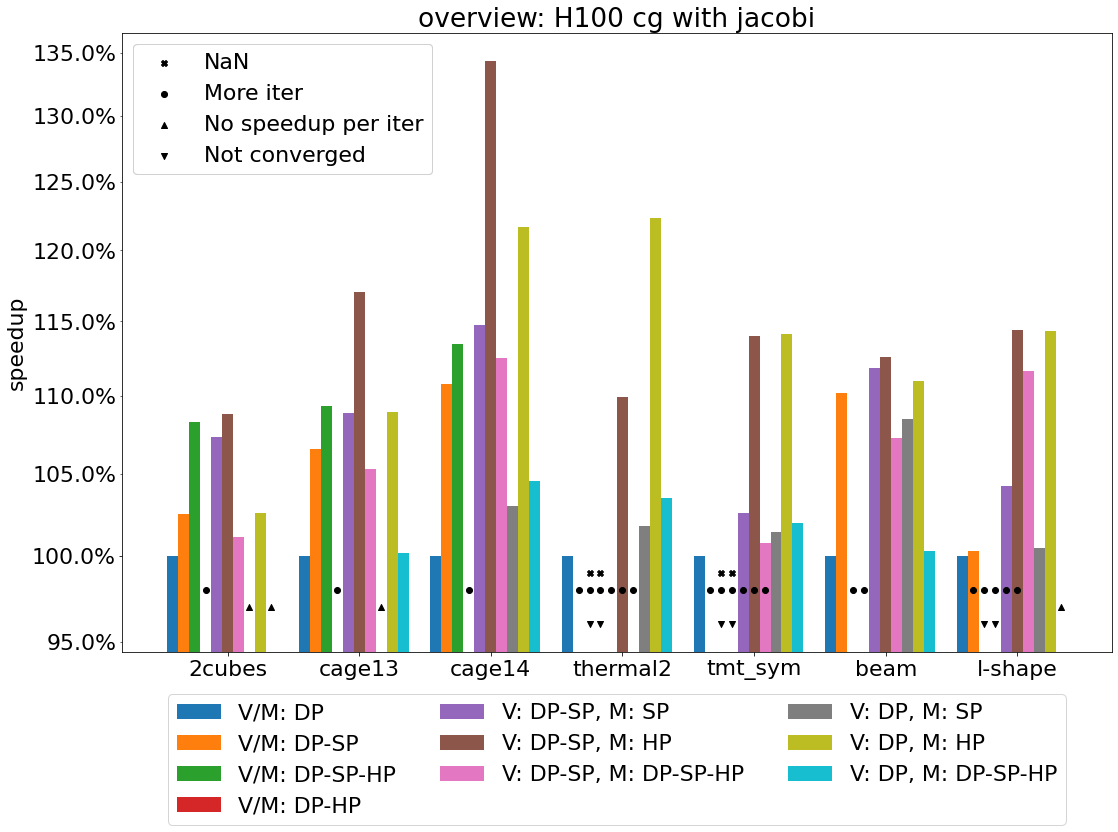

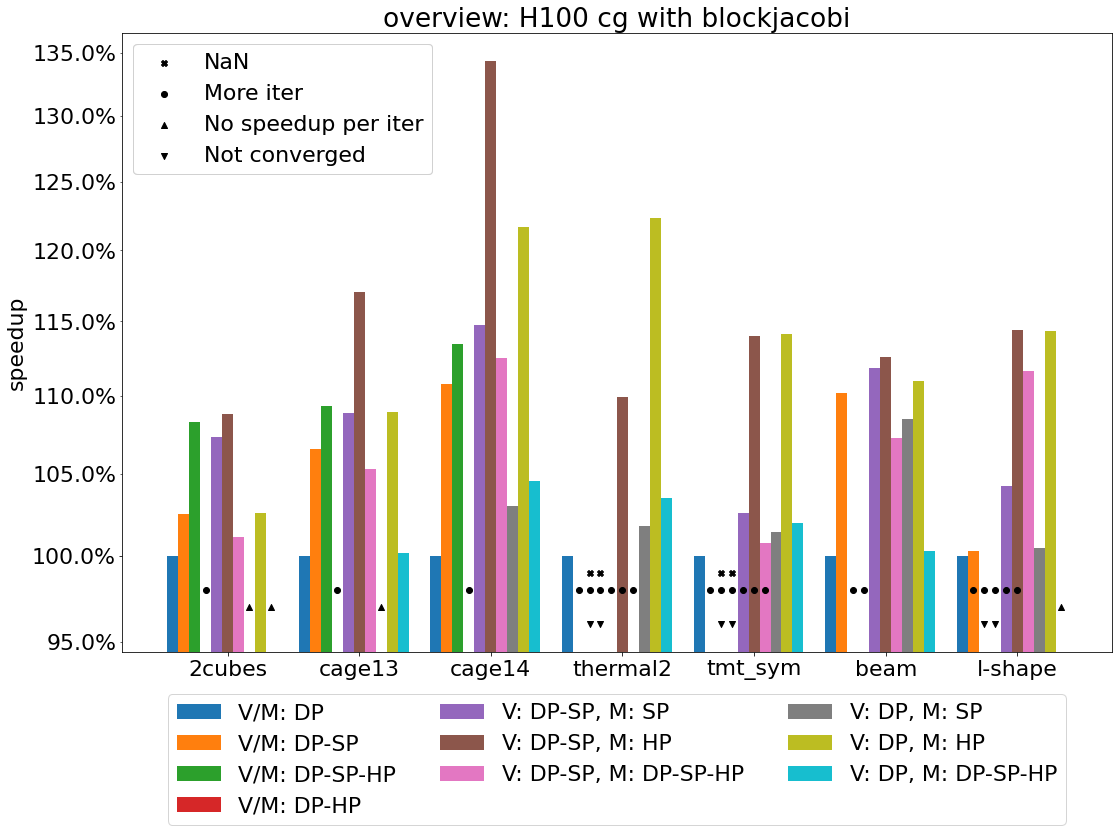

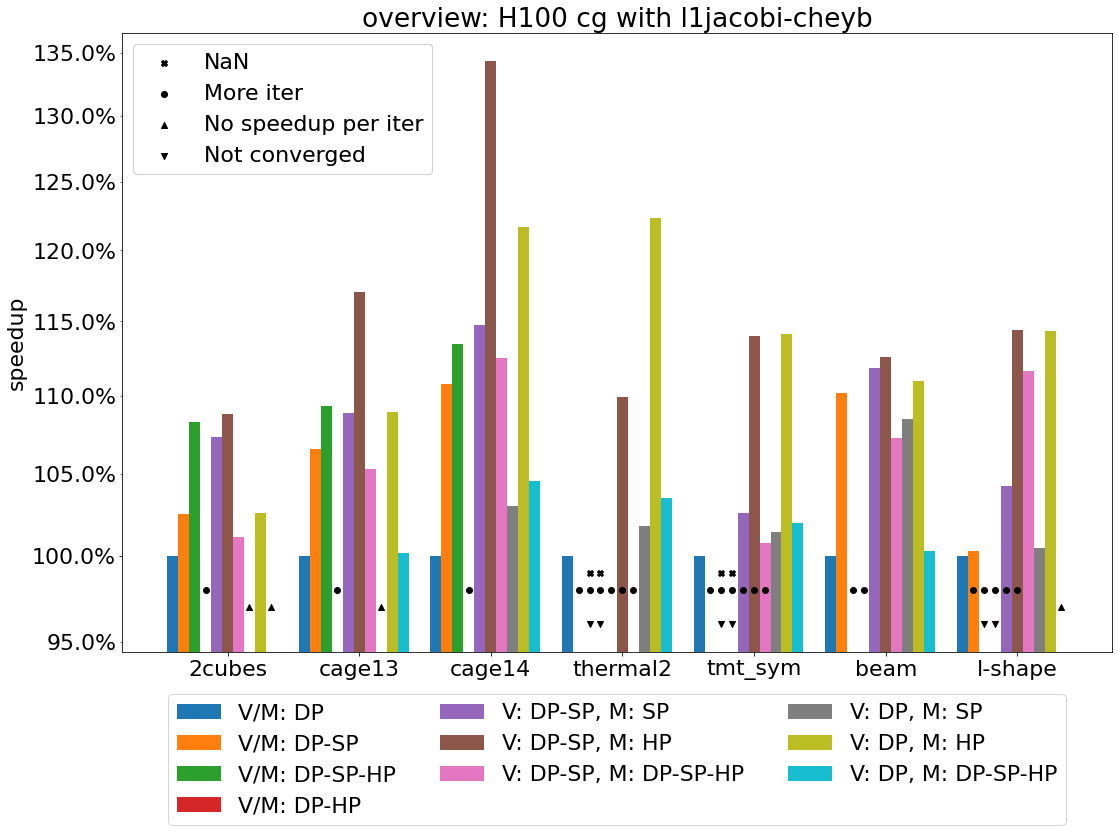

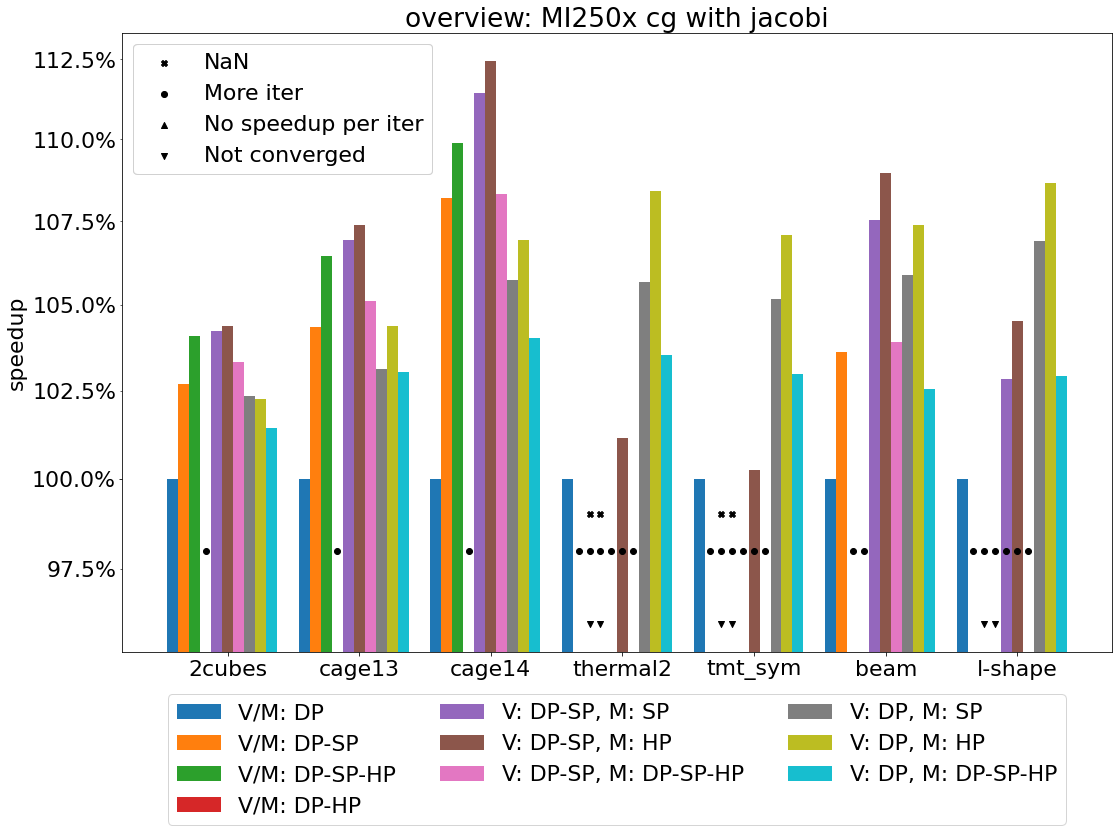

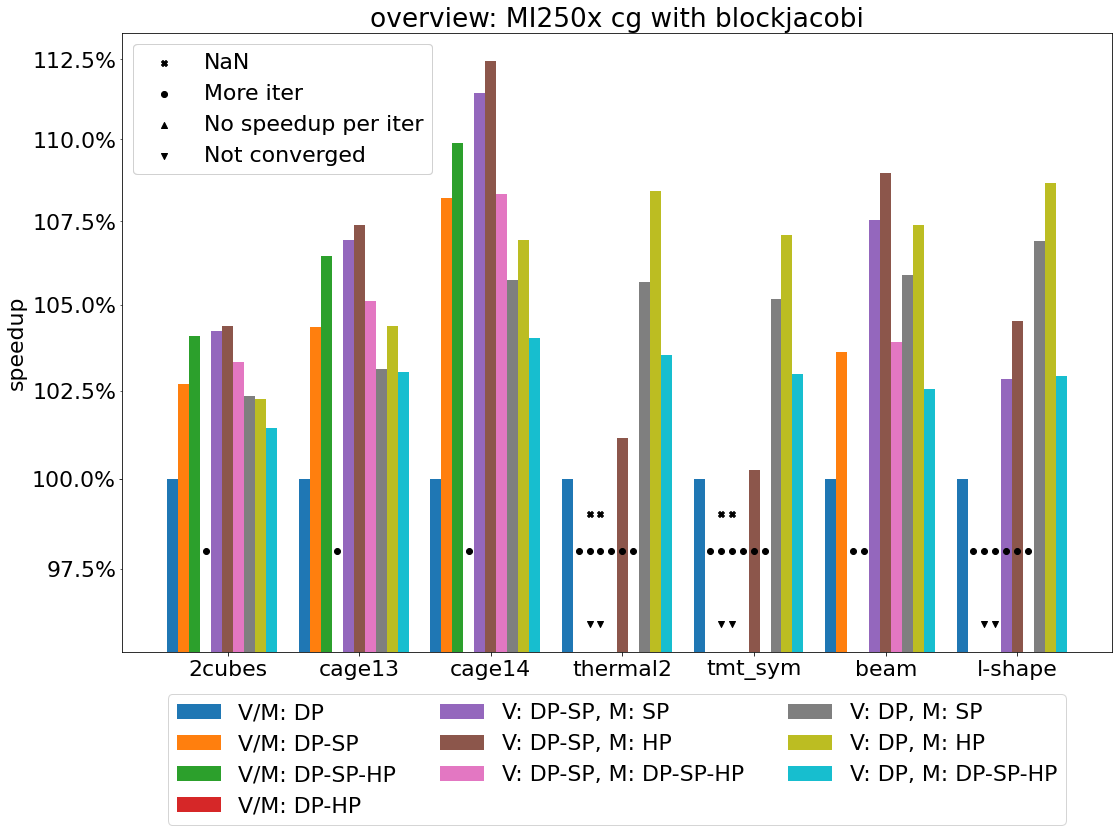

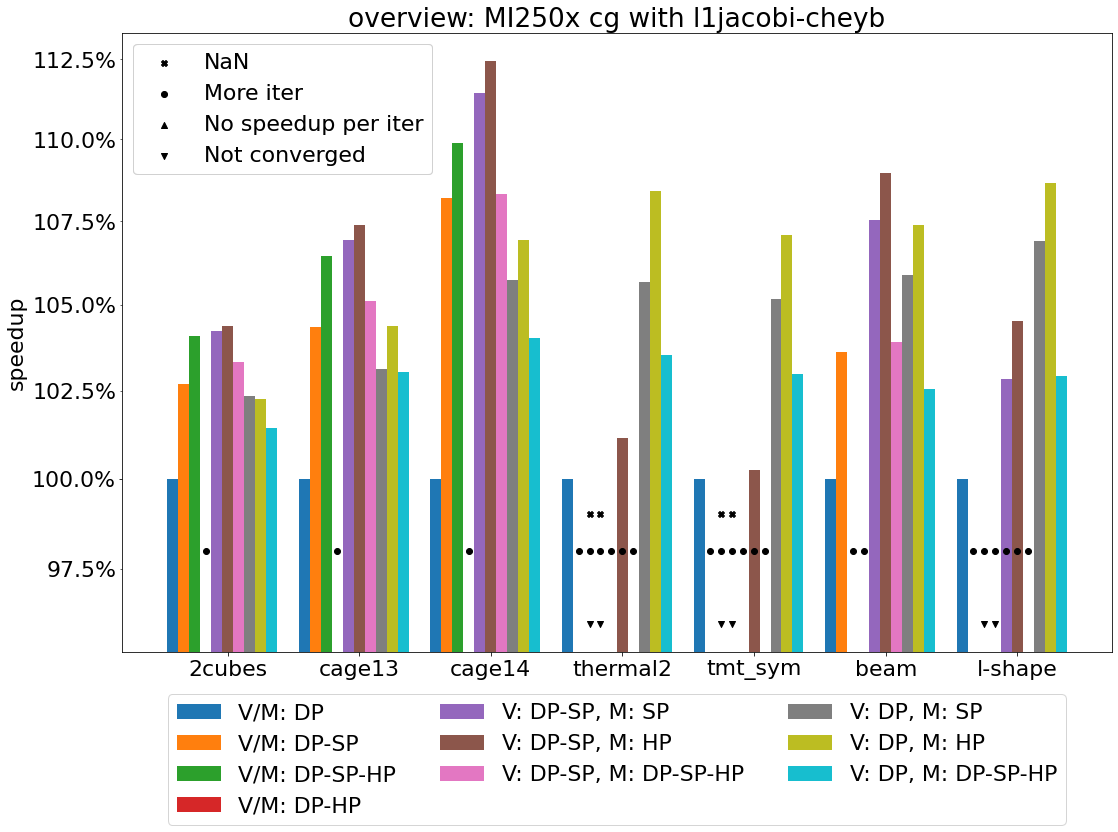

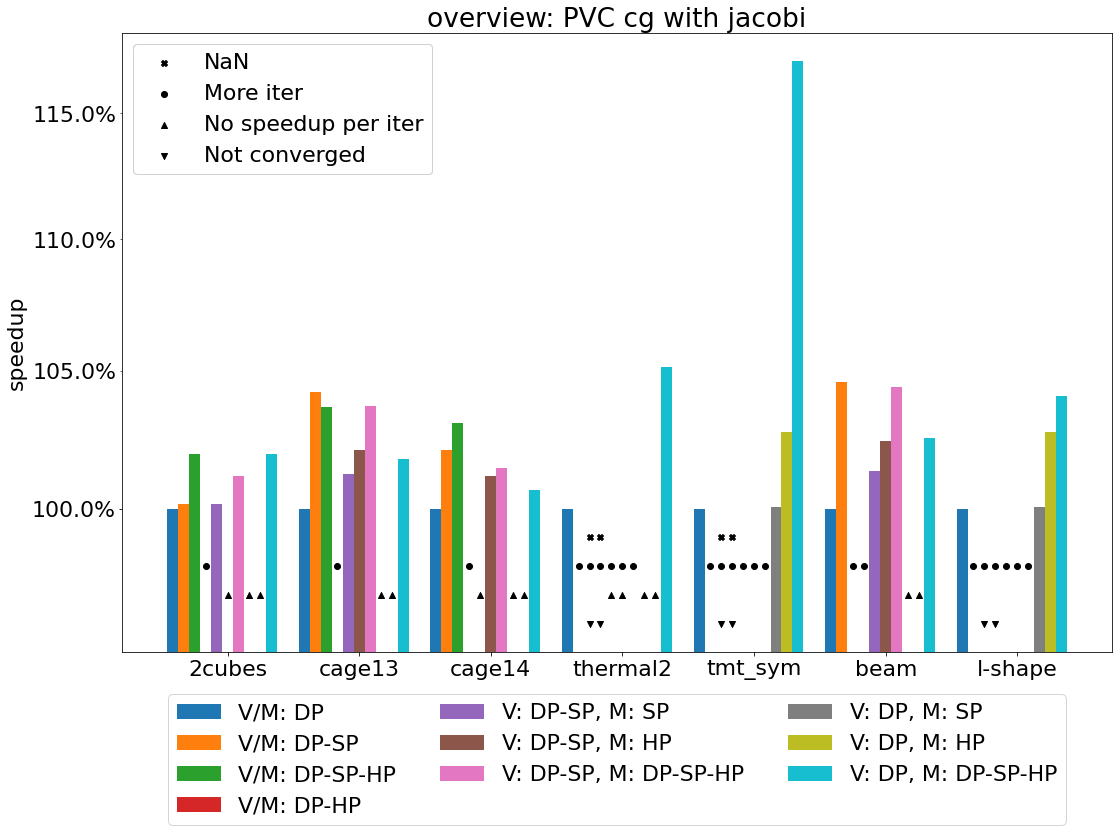

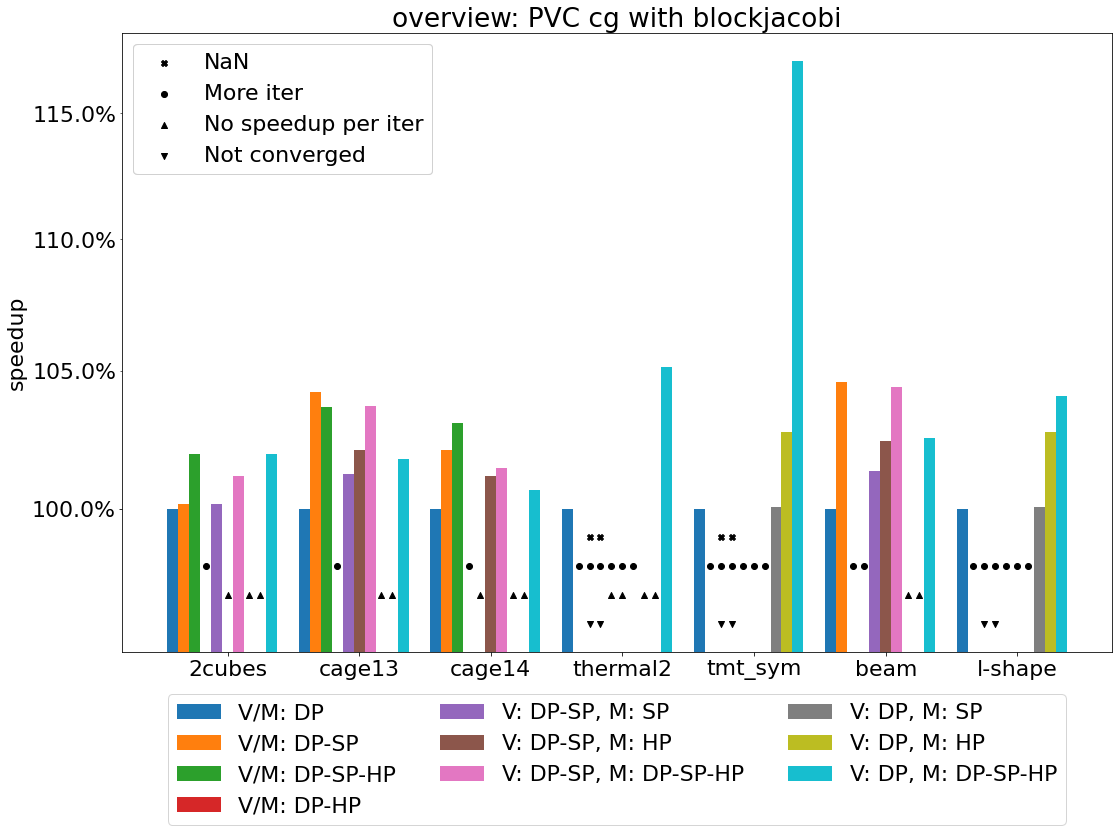

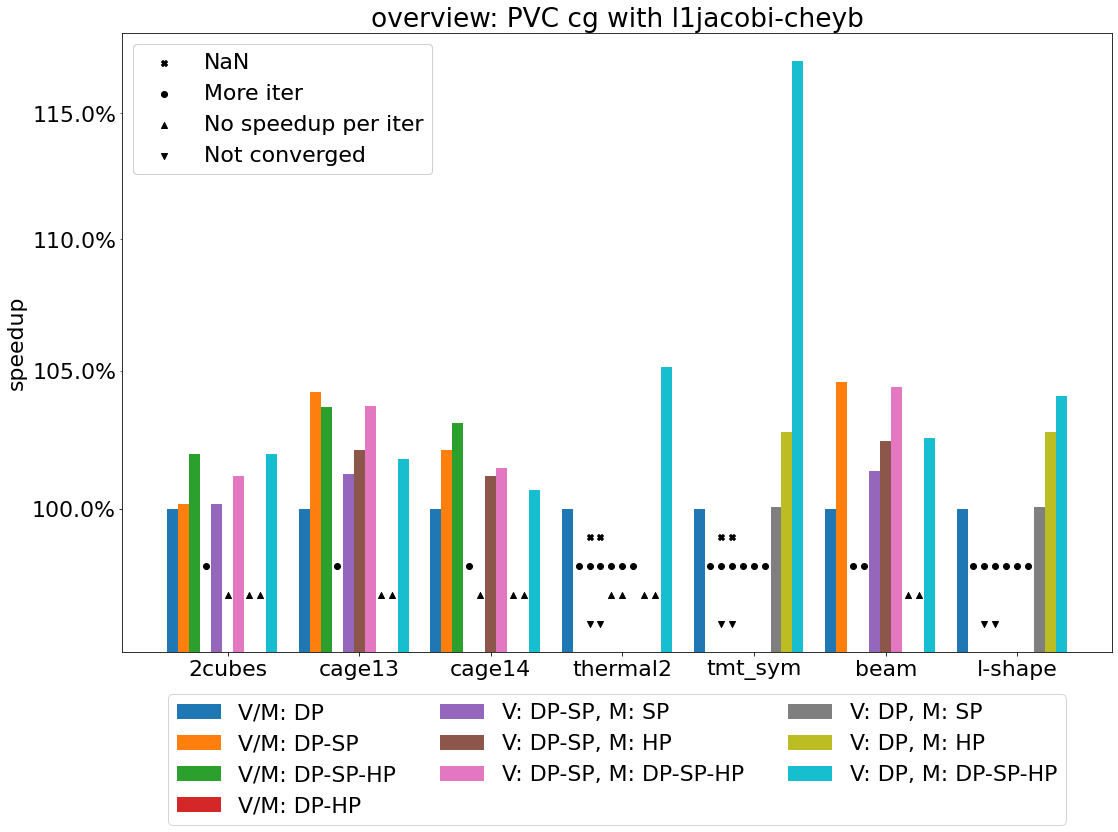

In [131]:
plot_overview('h100_th_result/collect_case_10_v_cg_jacobi.csv', "overview: H100 cg with jacobi", "speedup", 
              saved_name=generate_saved_name("H100 cg with jacobi", 'speedup overview'))

plot_overview('h100_th_result/collect_case_10_v_cg_jacobi.csv', "overview: H100 cg with blockjacobi", "speedup", 
              saved_name=generate_saved_name("H100 cg with blockjacobi", 'speedup overview'))

plot_overview('h100_th_result/collect_case_10_v_cg_jacobi.csv', "overview: H100 cg with l1jacobi-cheyb", "speedup", 
              saved_name=generate_saved_name("H100 cg with l1jacobi-cheyb", 'speedup overview'))

plot_overview('MI250x_oh_result/collect_case_10_v_cg_jacobi.csv', "overview: MI250x cg with jacobi", "speedup", 
              saved_name=generate_saved_name("MI250x cg with jacobi", 'speedup overview'))

plot_overview('MI250x_oh_result/collect_case_10_v_cg_jacobi.csv', "overview: MI250x cg with blockjacobi", "speedup", 
              saved_name=generate_saved_name("MI250x cg with blockjacobi", 'speedup overview'))

plot_overview('MI250x_oh_result/collect_case_10_v_cg_jacobi.csv', "overview: MI250x cg with l1jacobi-cheyb", "speedup", 
              saved_name=generate_saved_name("MI250x cg with l1jacobi-cheyb", 'speedup overview'))

plot_overview('PVC_result/collect_case_10_v_cg_jacobi.csv', "overview: PVC cg with jacobi", "speedup", 
              saved_name=generate_saved_name("PVC cg with jacobi", 'speedup overview'))

plot_overview('PVC_result/collect_case_10_v_cg_jacobi.csv', "overview: PVC cg with blockjacobi", "speedup", 
              saved_name=generate_saved_name("PVC cg with blockjacobi", 'speedup overview'))

plot_overview('PVC_result/collect_case_10_v_cg_jacobi.csv', "overview: PVC cg with l1jacobi-cheyb", "speedup", 
              saved_name=generate_saved_name("PVC cg with l1jacobi-cheyb", 'speedup overview'))

In [37]:
def group_bar_plot(group_list, x_tick, legend, title, y_label, use_percentage=True, saved_name=None):
    assert(len(x_tick) == len(group_list))
    x = np.arange(len(x_tick))  # the label locations
    width = 1.0/(len(legend)+2)
    multiplier = 1
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(figsize=(16, 10))
    ax = plt.gca()

    for i in range(len(legend)):
        data = group_list[:, i]
        offset = width * multiplier
        rects = ax.bar(x + offset, data, width, label=legend[i])
#         ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    ax.set_xticks(x + 0.5)
    ax.set_xticklabels(x_tick)
#     ax.legend(loc="upper left", bbox_to_anchor=(1.05, 0.9))
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)
    ax.set_yscale('log')
    if use_percentage:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter())
        ax.yaxis.set_minor_formatter(ticker.PercentFormatter())
    fig.tight_layout()
    if saved_name:
        fig.savefig(saved_name)
    plt.show()

In [3]:
def get_data(csv_file, group, item, idx=4, keep_unconverged=False):
    result = np.zeros((len(group), len(item)))
    group_idx = 0
    item_idx = 0
    with open(csv_file) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row[0] == "matrix":
                continue
            if group[group_idx] not in row[0]:
                continue
#             assert(row[0] == group[group_idx] + '_mixed' + item[item_idx])
            if int(row[2]) == 700 and not keep_unconverged:
                result[group_idx, item_idx] = np.nan
            else:
                result[group_idx, item_idx] = np.double(row[idx])
            item_idx = (item_idx + 1) % len(item)
            if item_idx == 0:
                group_idx = (group_idx + 1)
    assert(group_idx == len(group))
    return result

In [12]:
legend=["0", "1", "2", "3", "-11", "-12", "-13", "-21", "-22", "-23"]
legend_alias=["V/M: DP", "V/M: DP-SP", "V/M: DP-SP-HP", "V/M: DP-HP", 
              "V: DP-SP, M: SP", "V: DP-SP, M: HP", "V: DP-SP, M: DP-SP-HP",
              "V: DP, M: SP", "V: DP, M: HP", "V: DP, M: DP-SP-HP"]
x_tick=["2cubes_sphere", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_alias=["2cubes", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam", "l-shape"]
x_tick_jb=["2cubes_sphere", "cage13", "cage14", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_jb_alias=["2cubes", "cage13", "cage14", "thermal2", "tmt_sym", "beam", "l-shape"]
x_tick_cheyb=["2cubes_sphere", "offshore", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_cheyb_alias=["2cubes", "offshore", "thermal2", "tmt_sym", "beam", "l-shape"]

In [33]:
def generate_saved_name(title, kind):
    name = title + ' ' + kind + '.png'
    return name.replace(' ', '_')
def plot_total_speedup(filename, title, is_jacobi=True):
    x = x_tick_jb if is_jacobi else x_tick_cheyb
    x_alias = x_tick_jb_alias if is_jacobi else x_tick_cheyb_alias
    result = get_data(filename, x, legend, 4)
    speedup = result[:, [0]]/result 
    speedup = speedup * (speedup >= 1) * 100
    saved_name = generate_saved_name(title, 'total time speedup')
    group_bar_plot(speedup, x_alias, legend_alias, title, 'total time speedup', True, saved_name)

def plot_time_per_iter(filename, title):
    x = x_tick
    x_alias = x_tick_alias
    result = get_data(filename, x, legend, 5, keep_unconverged=True)
    speedup = result[:, [0]]/result * 100
    saved_name = generate_saved_name(title, 'time per iteration speedup')
    group_bar_plot(speedup, x_alias, legend_alias, title, 'time per iteration speedup', True, saved_name)

def plot_iteration(filename, title, is_jacobi=True):
    x = x_tick_jb if is_jacobi else x_tick_cheyb
    x_alias = x_tick_jb_alias if is_jacobi else x_tick_cheyb_alias
    result = get_data(filename, x, legend, 2)
#     speedup = result[:, [0]]/result
#     speedup = speedup * (speedup >= 1)
    saved_name = generate_saved_name(title, 'iteration')
    group_bar_plot(result, x_alias, legend_alias, title, 'iteration', False, saved_name)

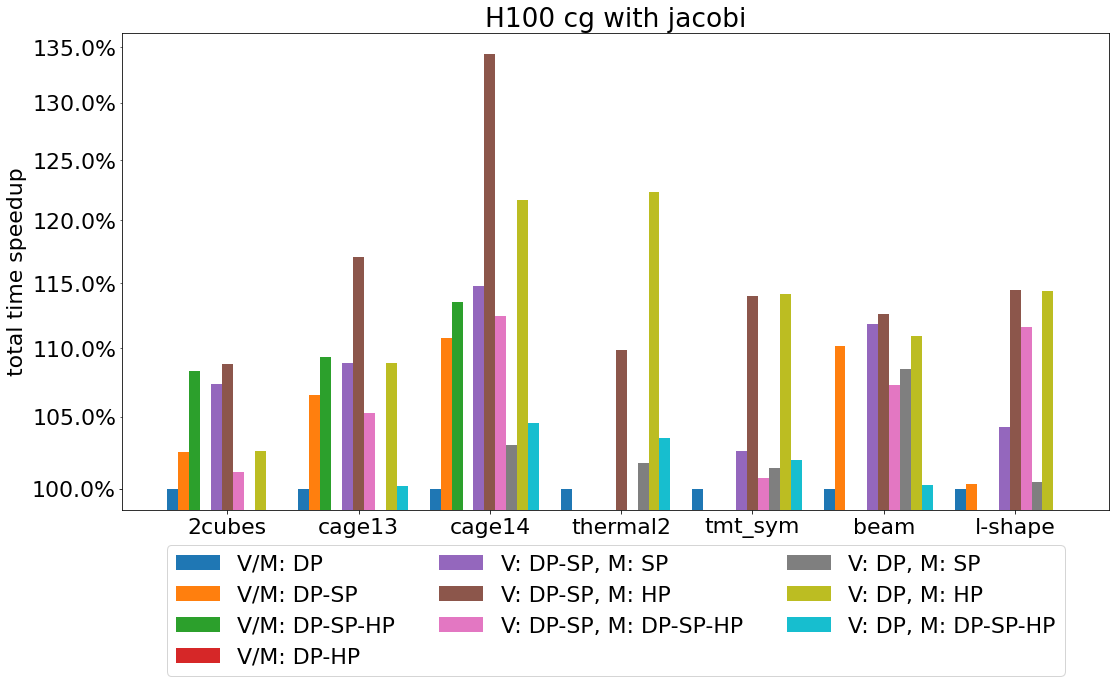

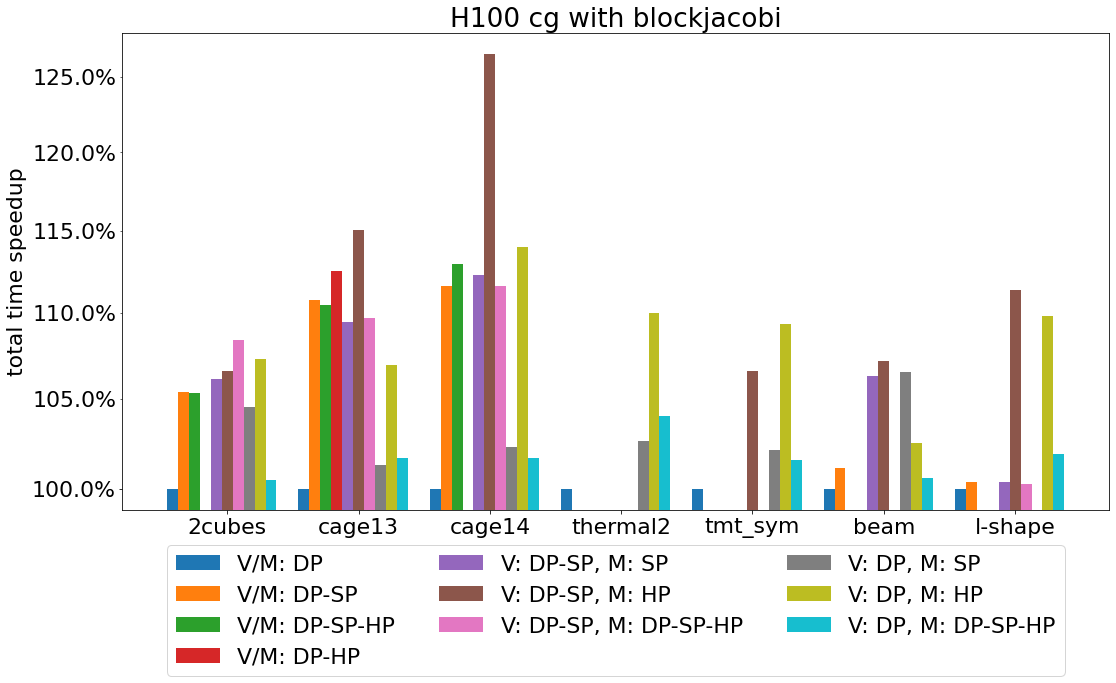

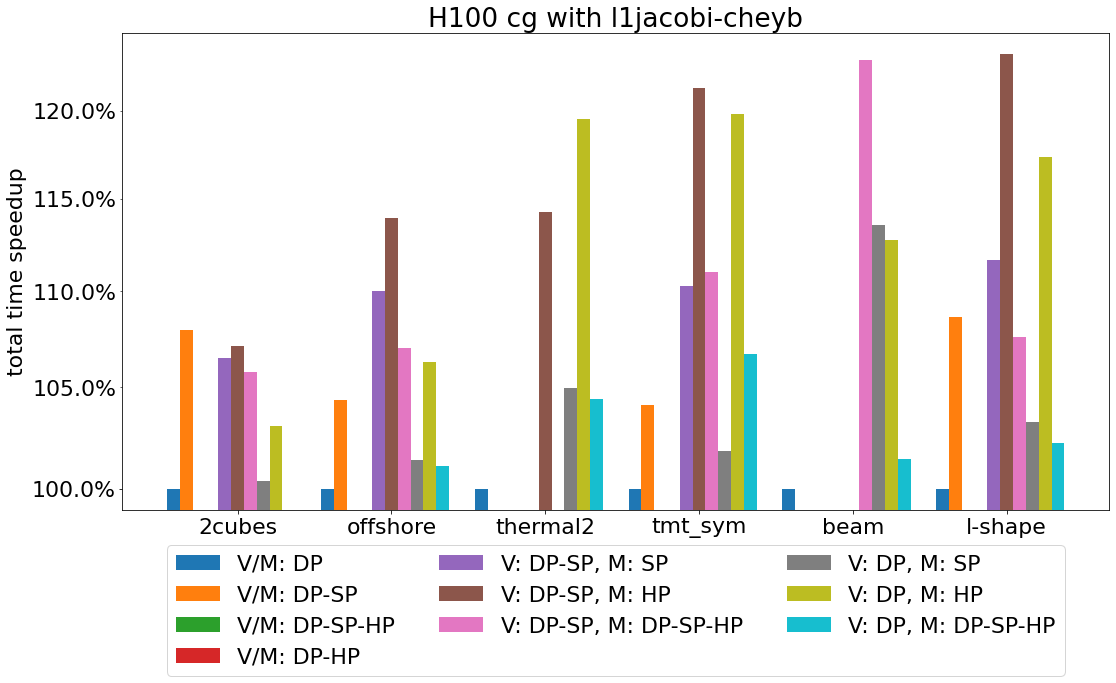

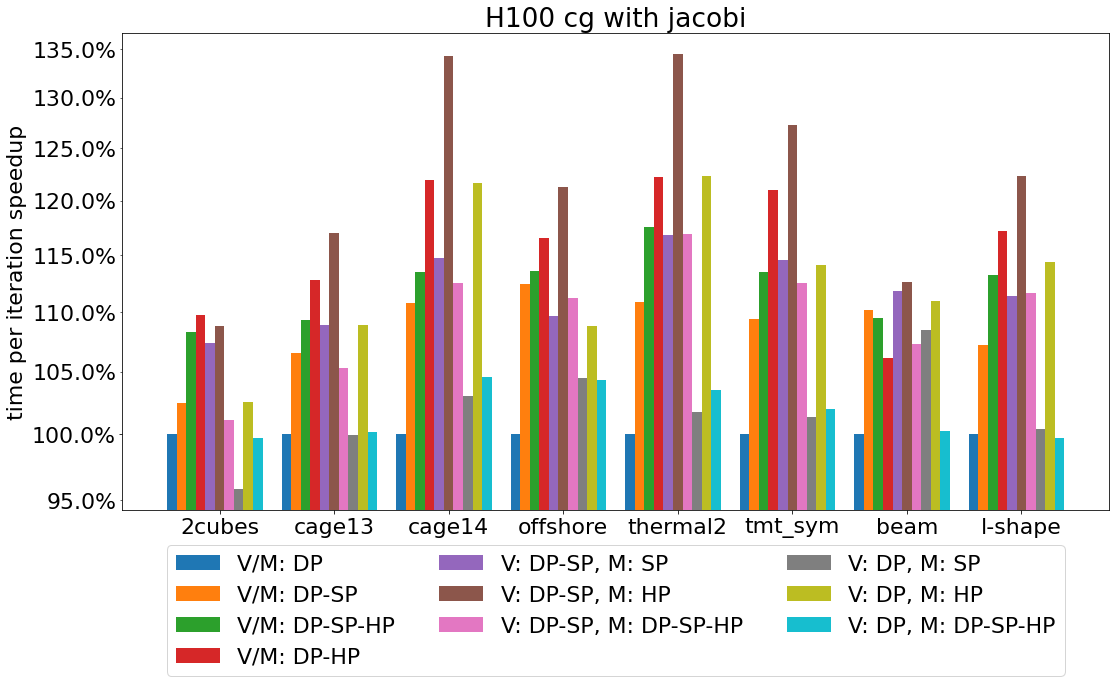

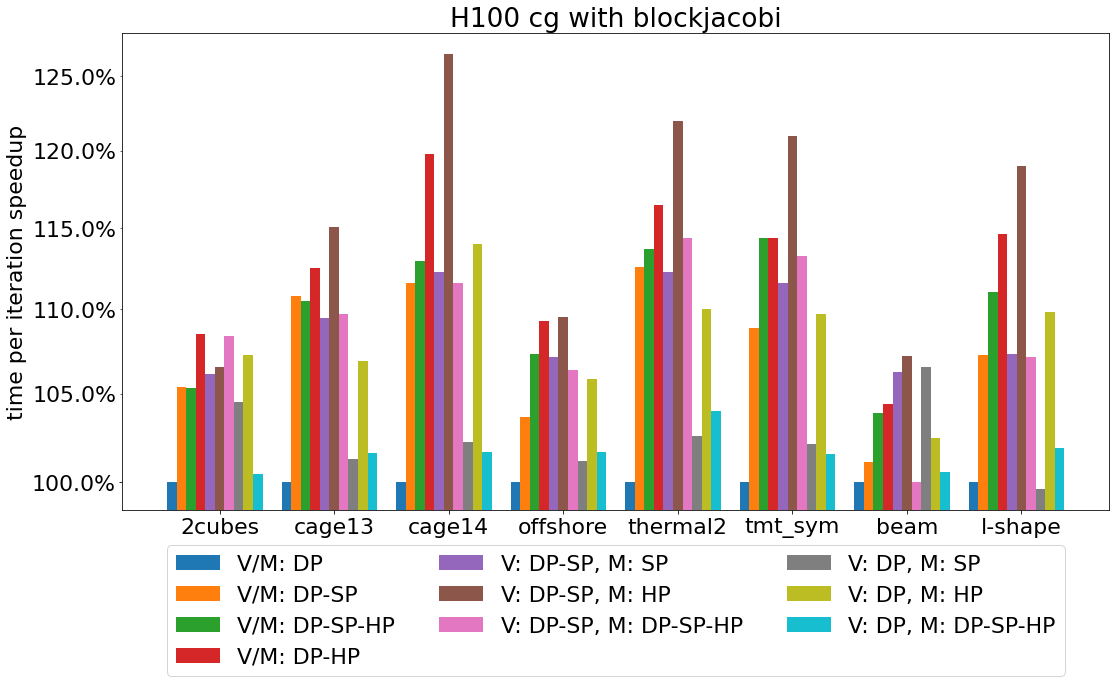

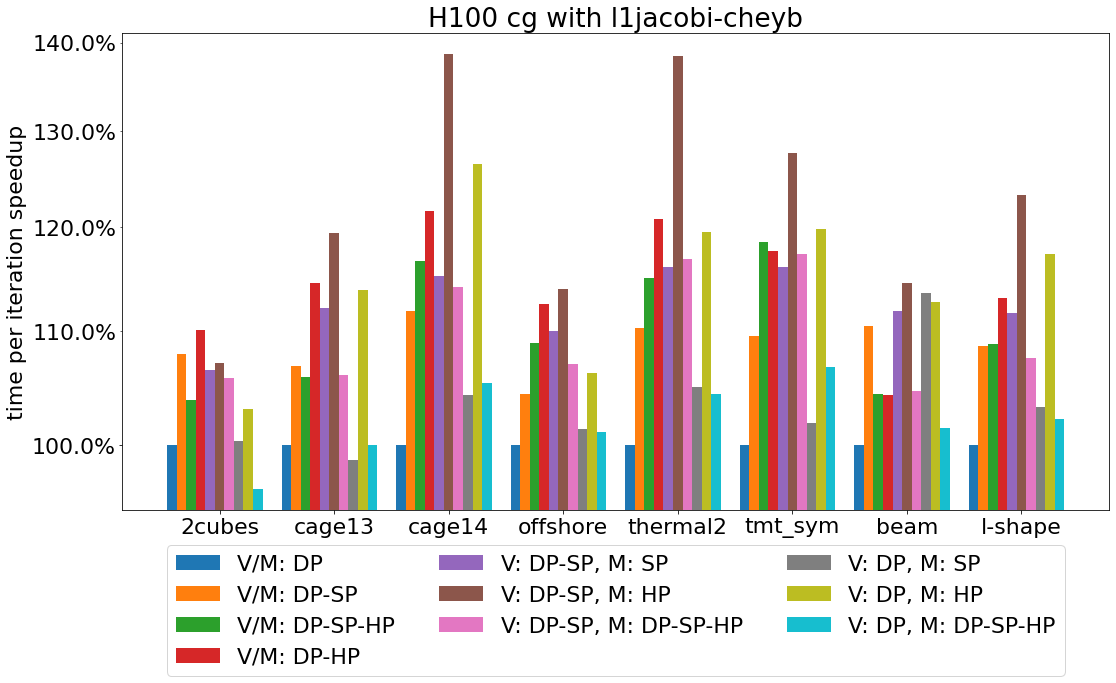

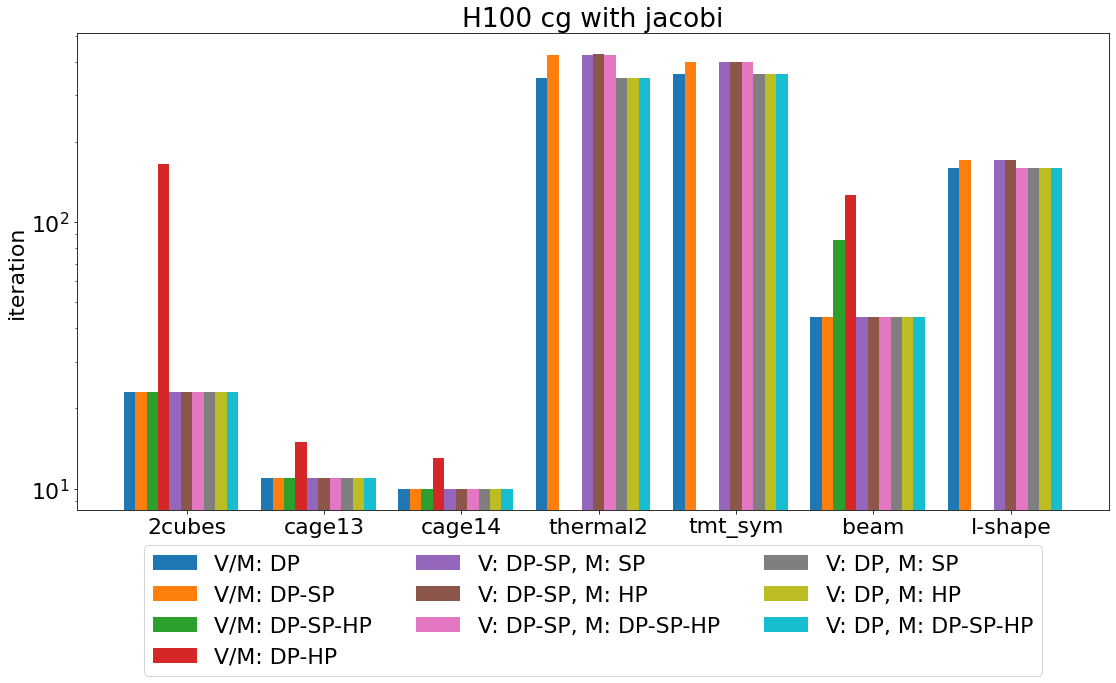

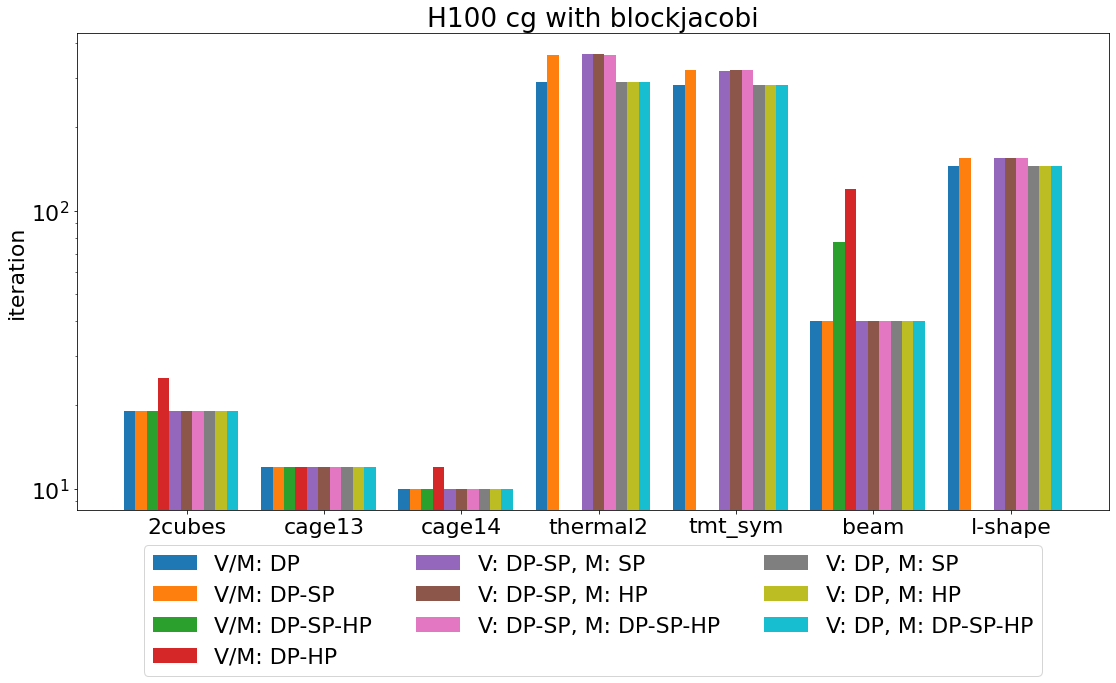

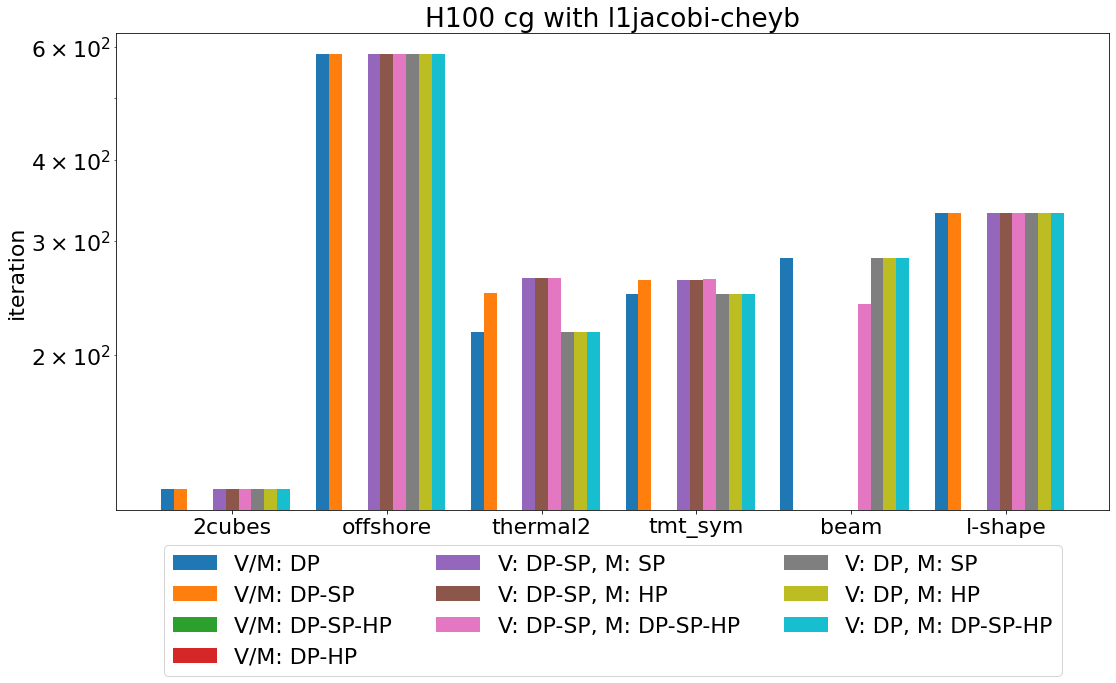

In [38]:
plot_total_speedup('h100_th_result/collect_case_10_v_cg_jacobi.csv', "H100 cg with jacobi")
plot_total_speedup('h100_th_result/collect_case_10_v_cg_bj.csv', "H100 cg with blockjacobi")
plot_total_speedup('h100_th_result/collect_case_10_v_cg_l1cheyb.csv', "H100 cg with l1jacobi-cheyb", is_jacobi=False)
plot_time_per_iter('h100_th_result/collect_case_10_v_cg_jacobi.csv', "H100 cg with jacobi")
plot_time_per_iter('h100_th_result/collect_case_10_v_cg_bj.csv', "H100 cg with blockjacobi")
plot_time_per_iter('h100_th_result/collect_case_10_v_cg_l1cheyb.csv', "H100 cg with l1jacobi-cheyb")
plot_iteration('h100_th_result/collect_case_10_v_cg_jacobi.csv', "H100 cg with jacobi")
plot_iteration('h100_th_result/collect_case_10_v_cg_bj.csv', "H100 cg with blockjacobi")
plot_iteration('h100_th_result/collect_case_10_v_cg_l1cheyb.csv', "H100 cg with l1jacobi-cheyb", is_jacobi=False)


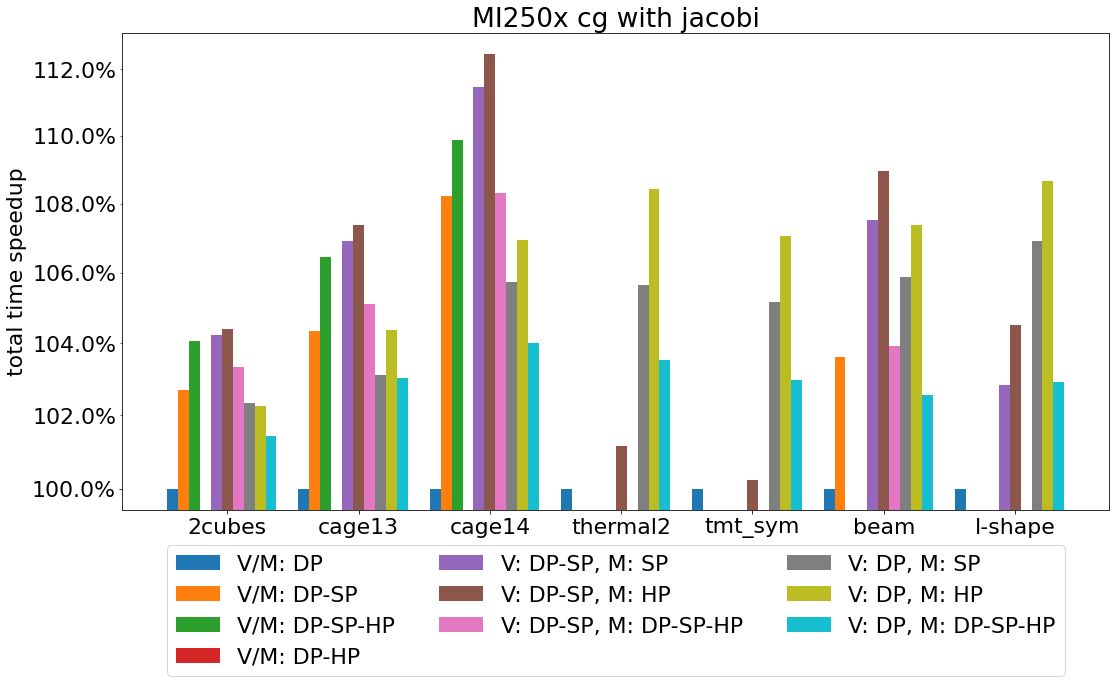

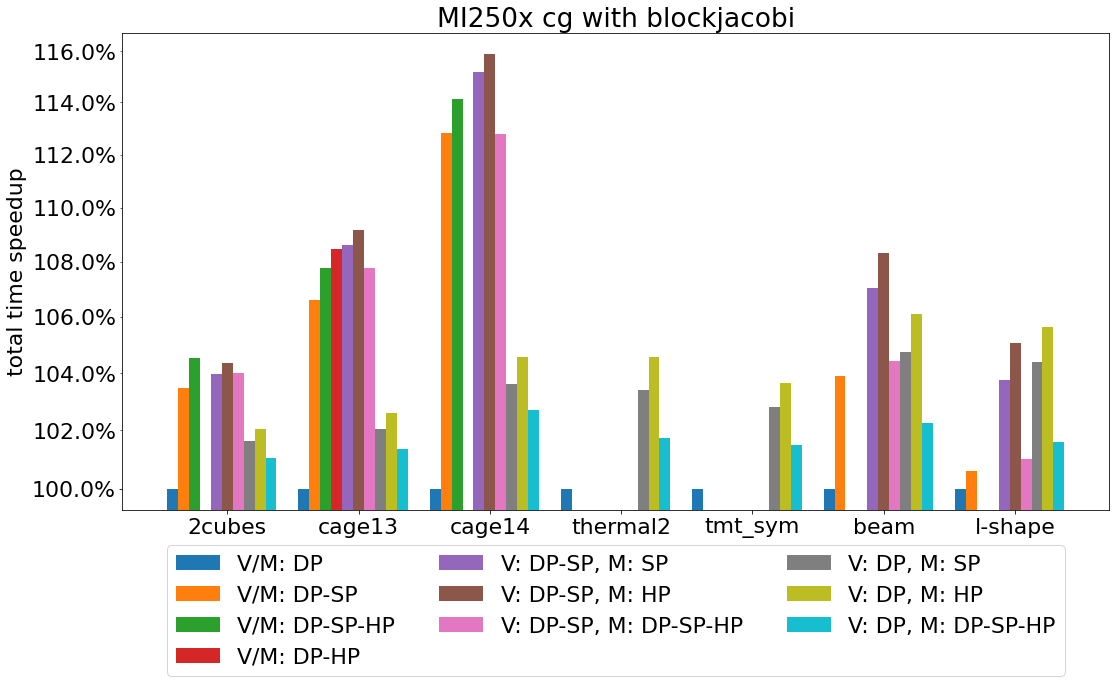

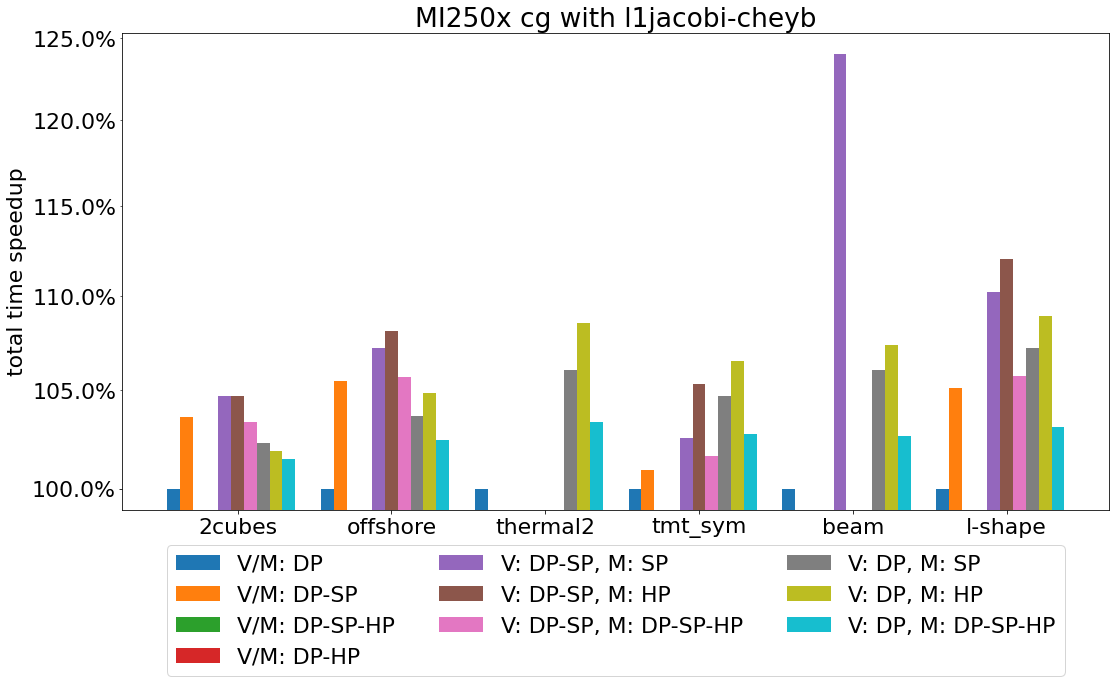

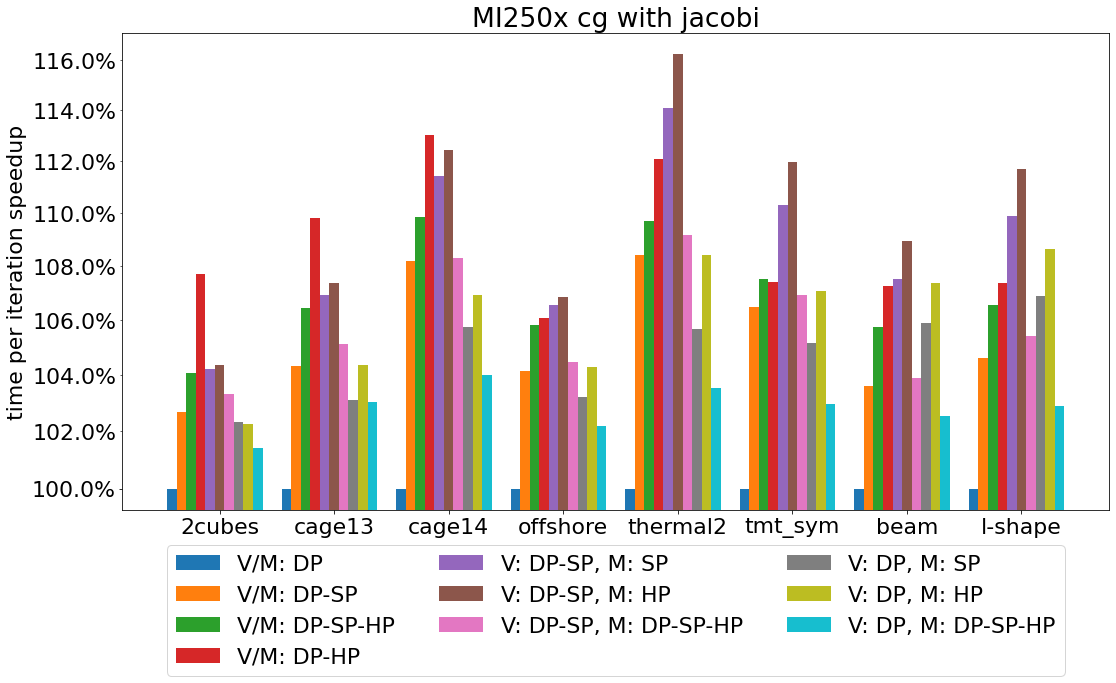

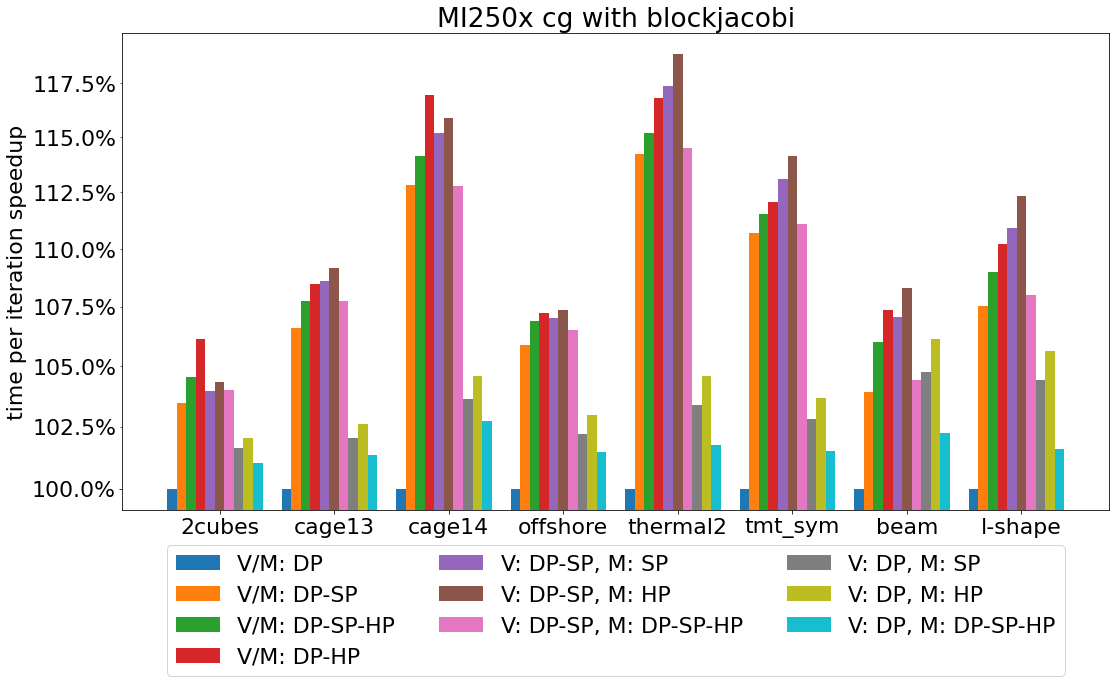

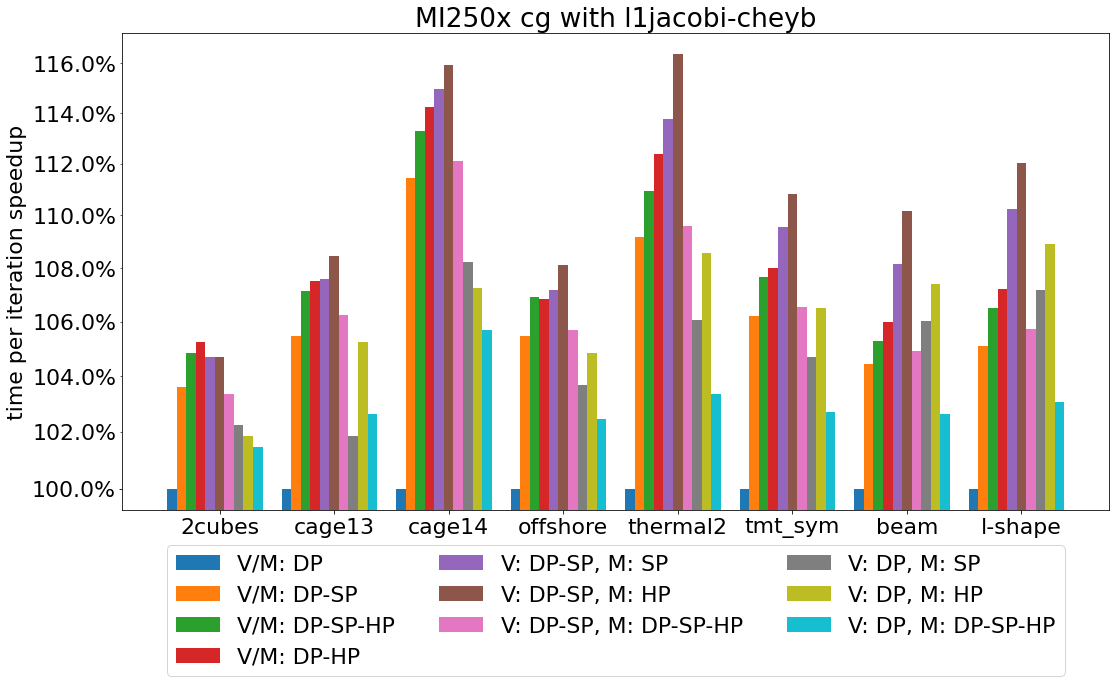

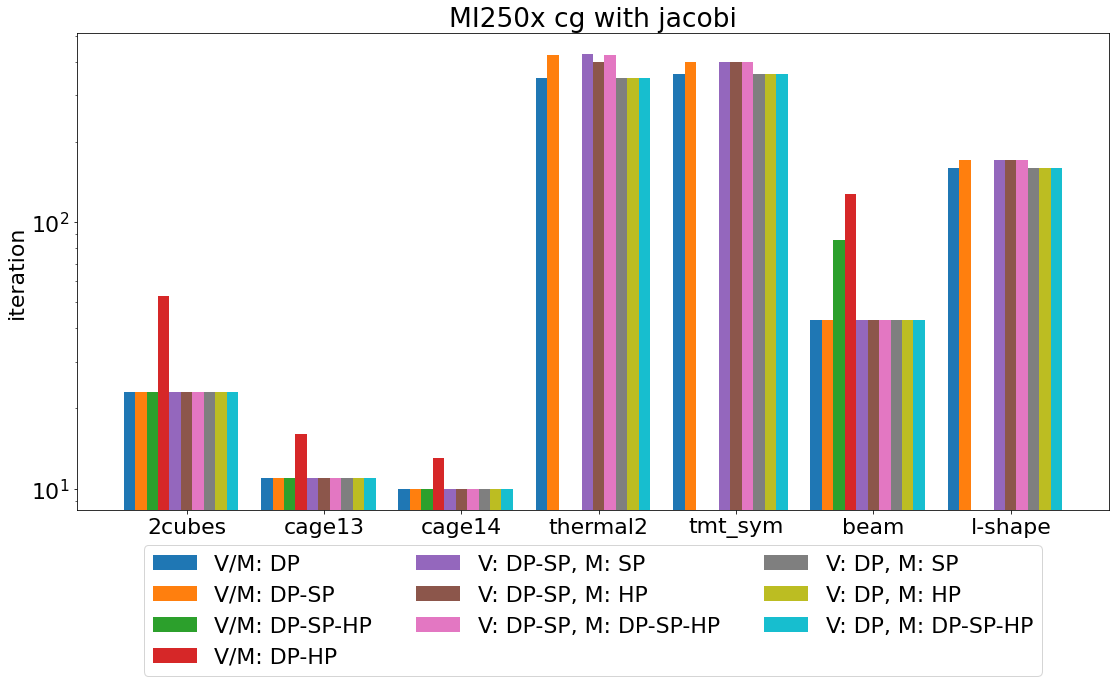

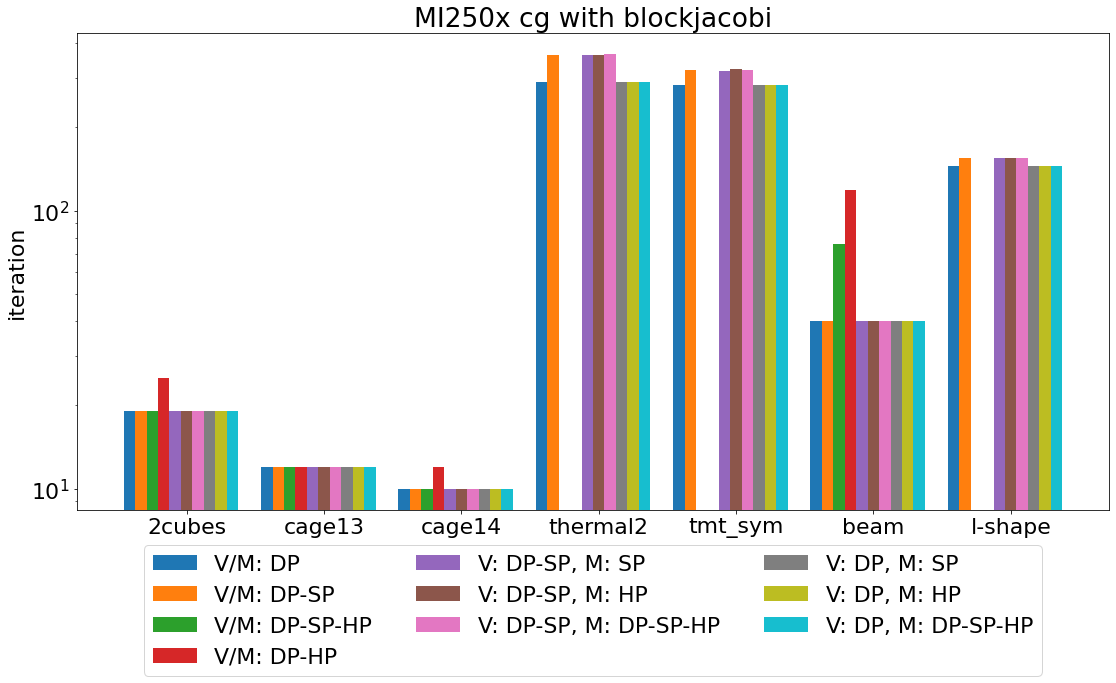

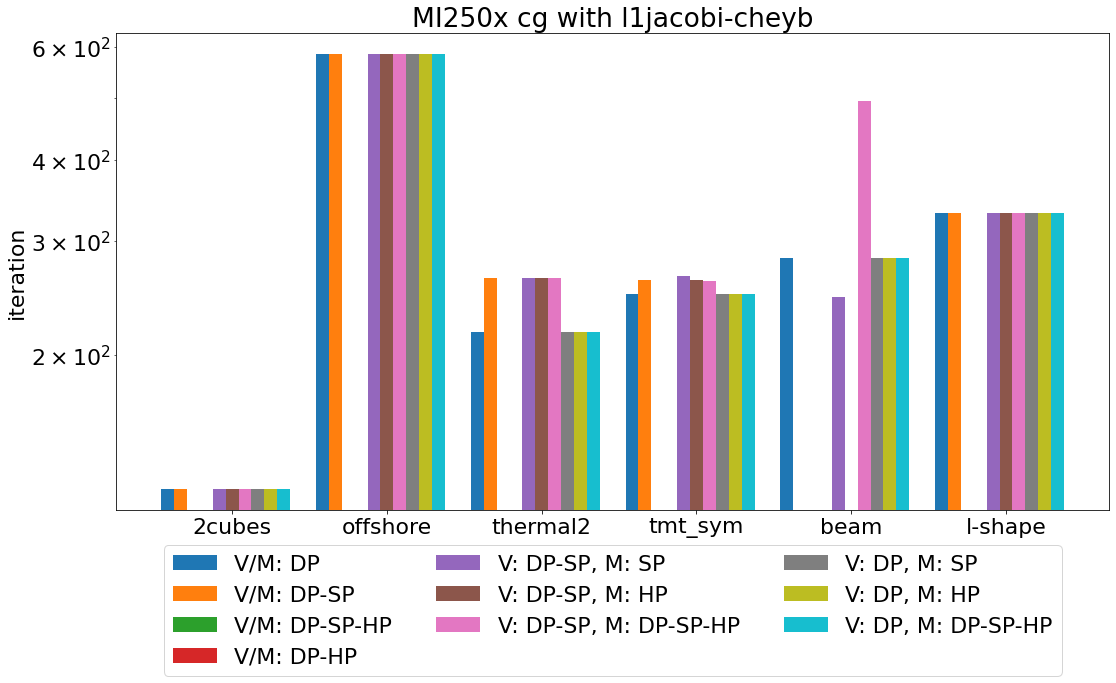

In [39]:
plot_total_speedup('MI250x_oh_result/collect_case_10_v_cg_jacobi.csv', "MI250x cg with jacobi")
plot_total_speedup('MI250x_oh_result/collect_case_10_v_cg_bj.csv', "MI250x cg with blockjacobi")
plot_total_speedup('MI250x_oh_result/collect_case_10_v_cg_l1cheyb.csv', "MI250x cg with l1jacobi-cheyb", is_jacobi=False)
plot_time_per_iter('MI250x_oh_result/collect_case_10_v_cg_jacobi.csv', "MI250x cg with jacobi")
plot_time_per_iter('MI250x_oh_result/collect_case_10_v_cg_bj.csv', "MI250x cg with blockjacobi")
plot_time_per_iter('MI250x_oh_result/collect_case_10_v_cg_l1cheyb.csv', "MI250x cg with l1jacobi-cheyb")
plot_iteration('MI250x_oh_result/collect_case_10_v_cg_jacobi.csv', "MI250x cg with jacobi")
plot_iteration('MI250x_oh_result/collect_case_10_v_cg_bj.csv', "MI250x cg with blockjacobi")
plot_iteration('MI250x_oh_result/collect_case_10_v_cg_l1cheyb.csv', "MI250x cg with l1jacobi-cheyb", is_jacobi=False)


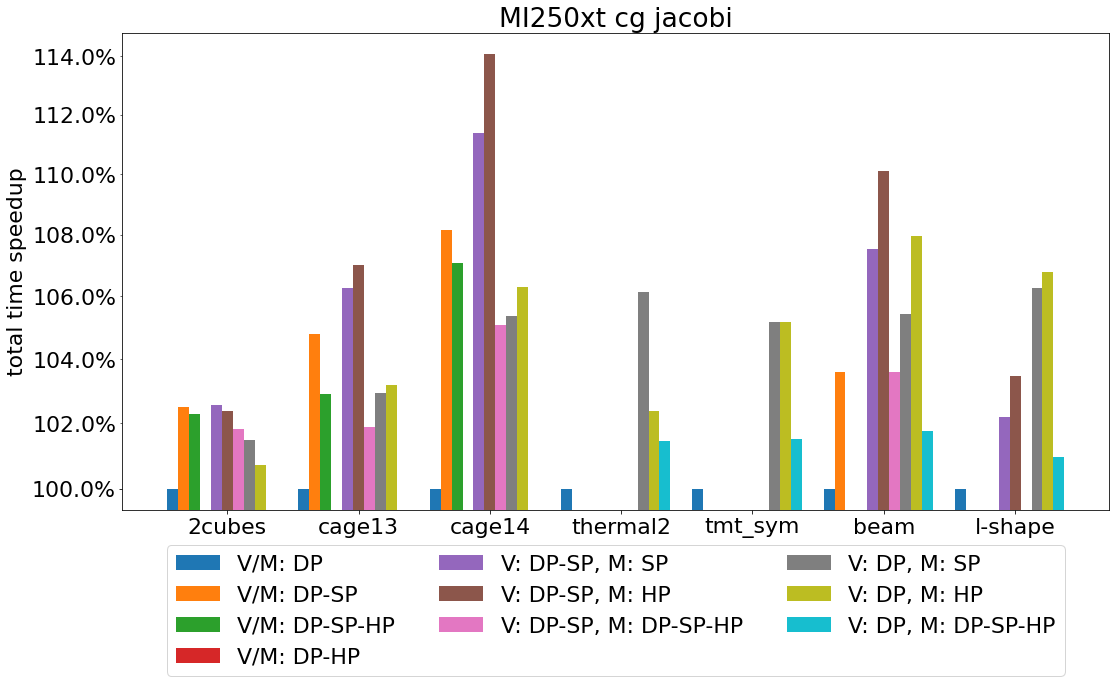

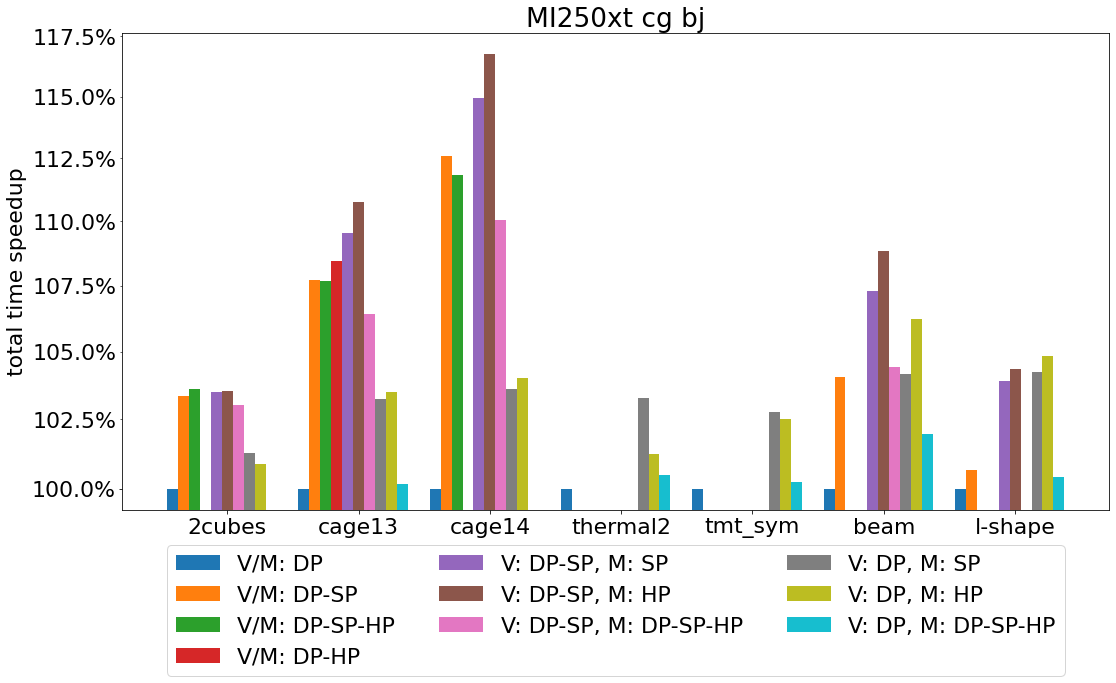

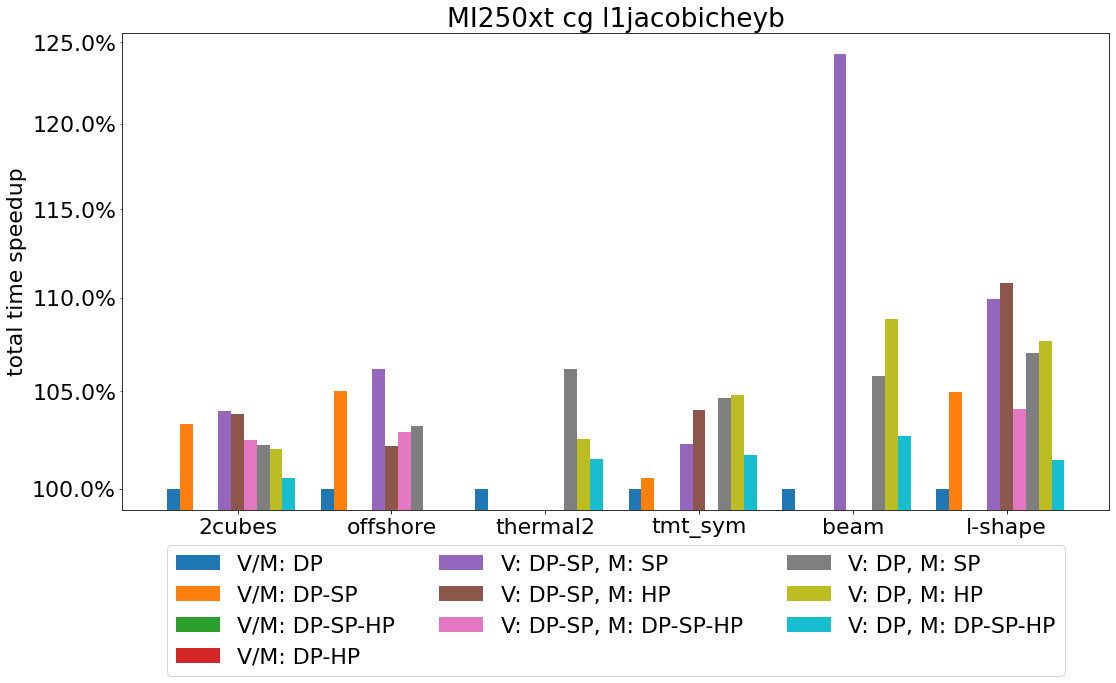

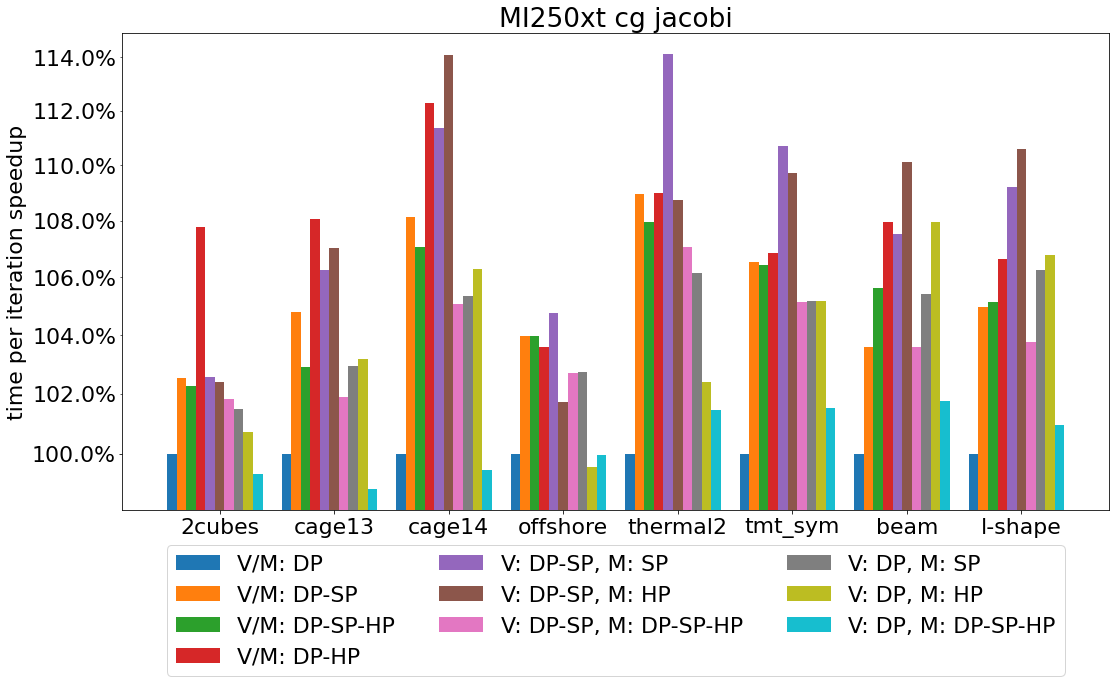

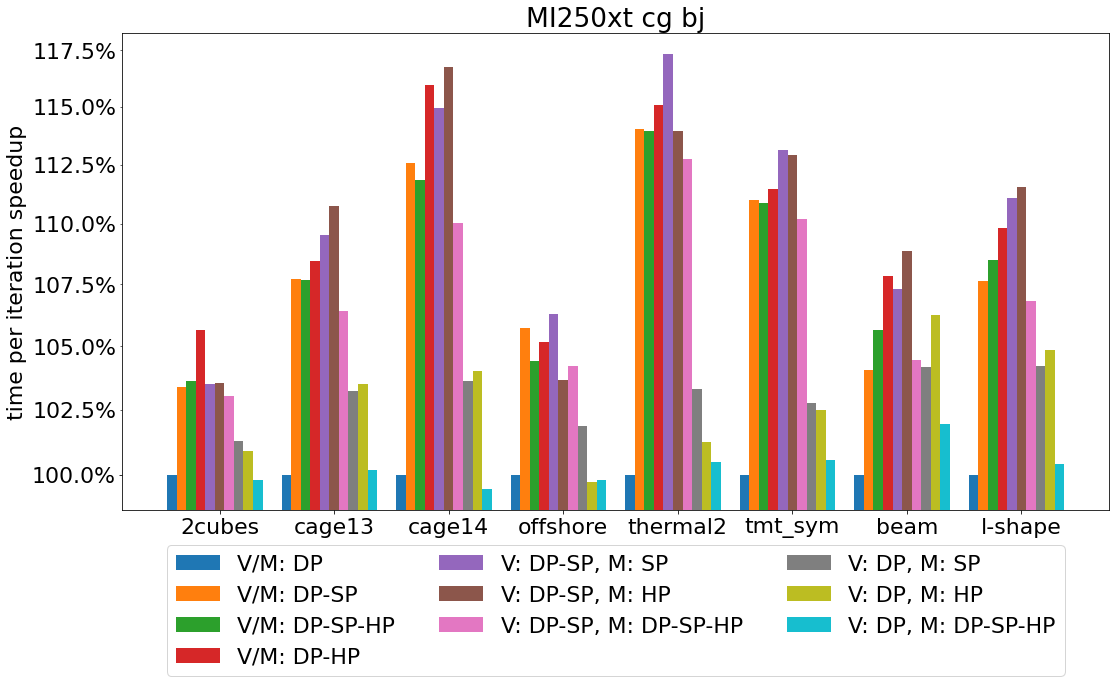

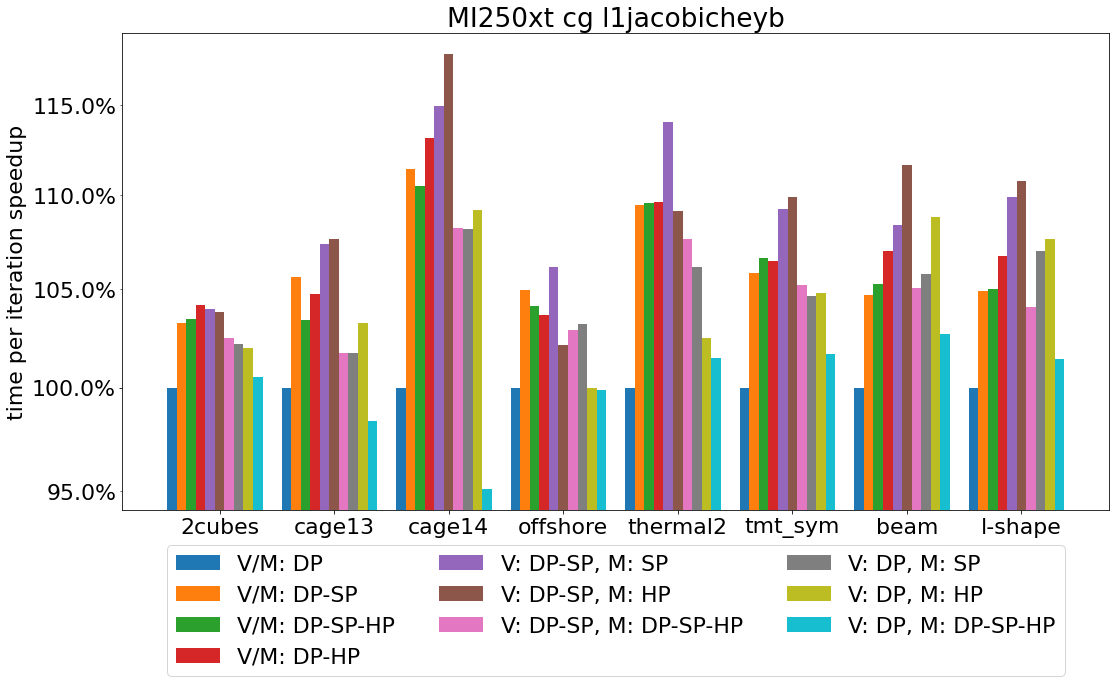

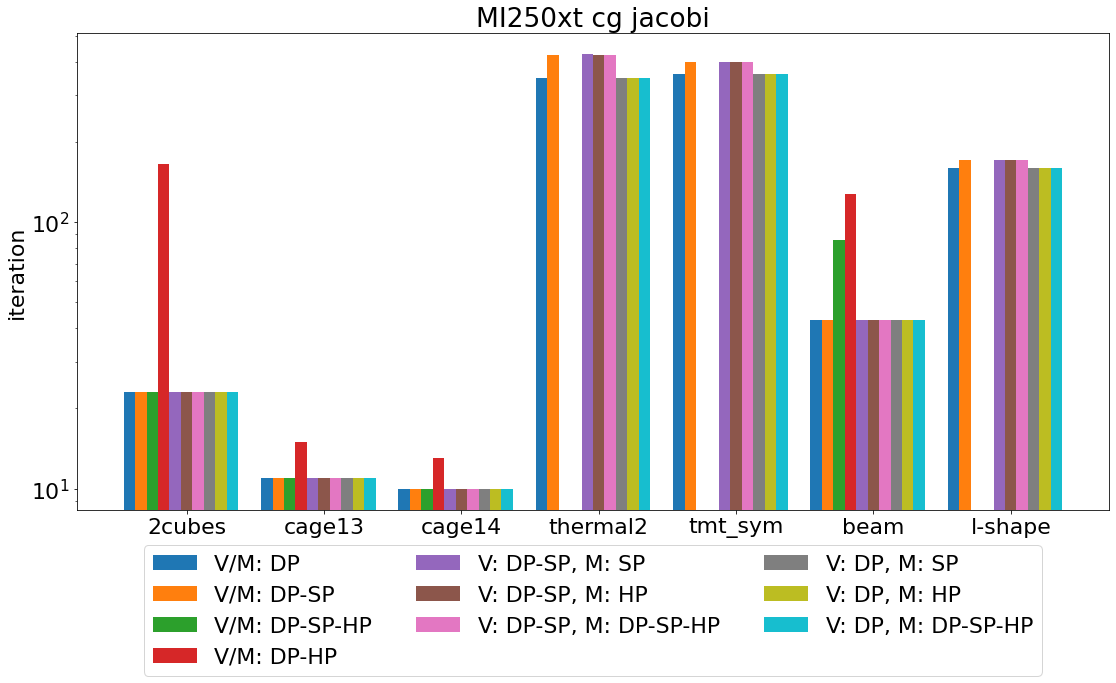

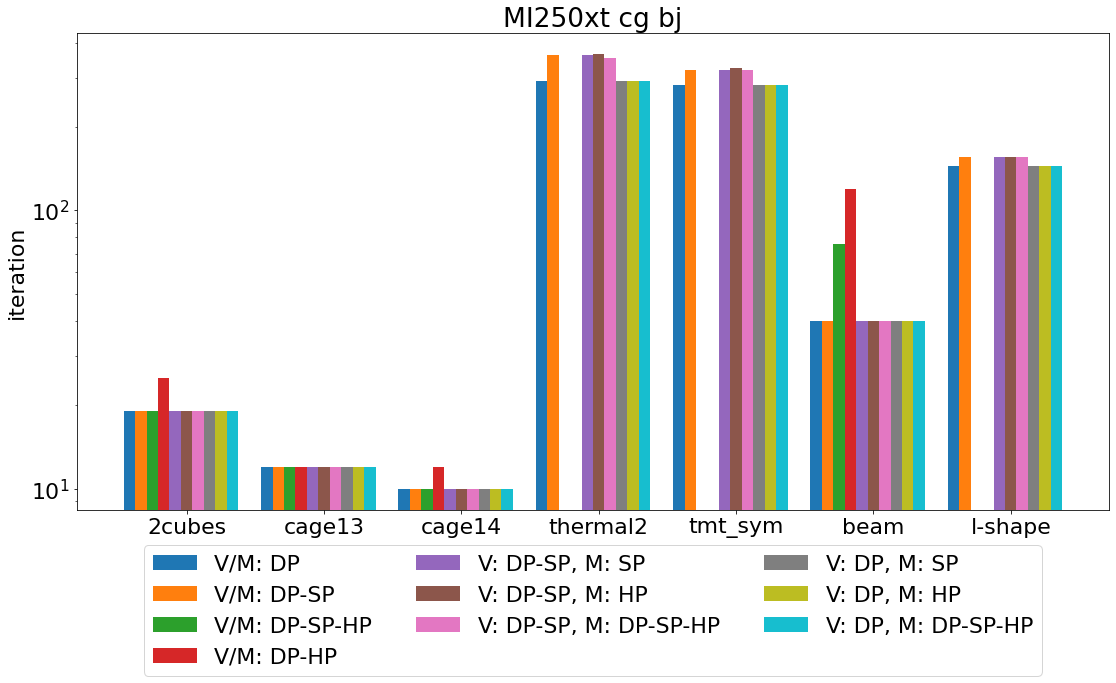

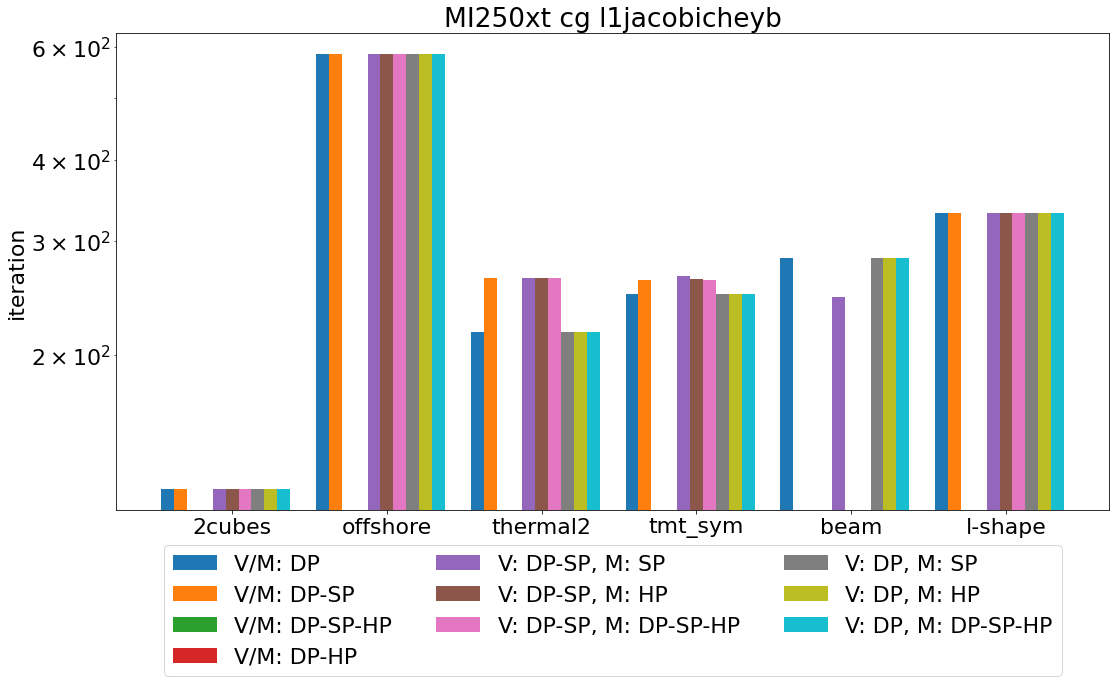

In [40]:
plot_total_speedup('MI250x_th_result/collect_case_10_v_cg_jacobi.csv', "MI250xt cg jacobi")
plot_total_speedup('MI250x_th_result/collect_case_10_v_cg_bj.csv', "MI250xt cg bj")
plot_total_speedup('MI250x_th_result/collect_case_10_v_cg_l1cheyb.csv', "MI250xt cg l1jacobicheyb", is_jacobi=False)
plot_time_per_iter('MI250x_th_result/collect_case_10_v_cg_jacobi.csv', "MI250xt cg jacobi")
plot_time_per_iter('MI250x_th_result/collect_case_10_v_cg_bj.csv', "MI250xt cg bj")
plot_time_per_iter('MI250x_th_result/collect_case_10_v_cg_l1cheyb.csv', "MI250xt cg l1jacobicheyb")
plot_iteration('MI250x_th_result/collect_case_10_v_cg_jacobi.csv', "MI250xt cg jacobi")
plot_iteration('MI250x_th_result/collect_case_10_v_cg_bj.csv', "MI250xt cg bj")
plot_iteration('MI250x_th_result/collect_case_10_v_cg_l1cheyb.csv', "MI250xt cg l1jacobicheyb", is_jacobi=False)

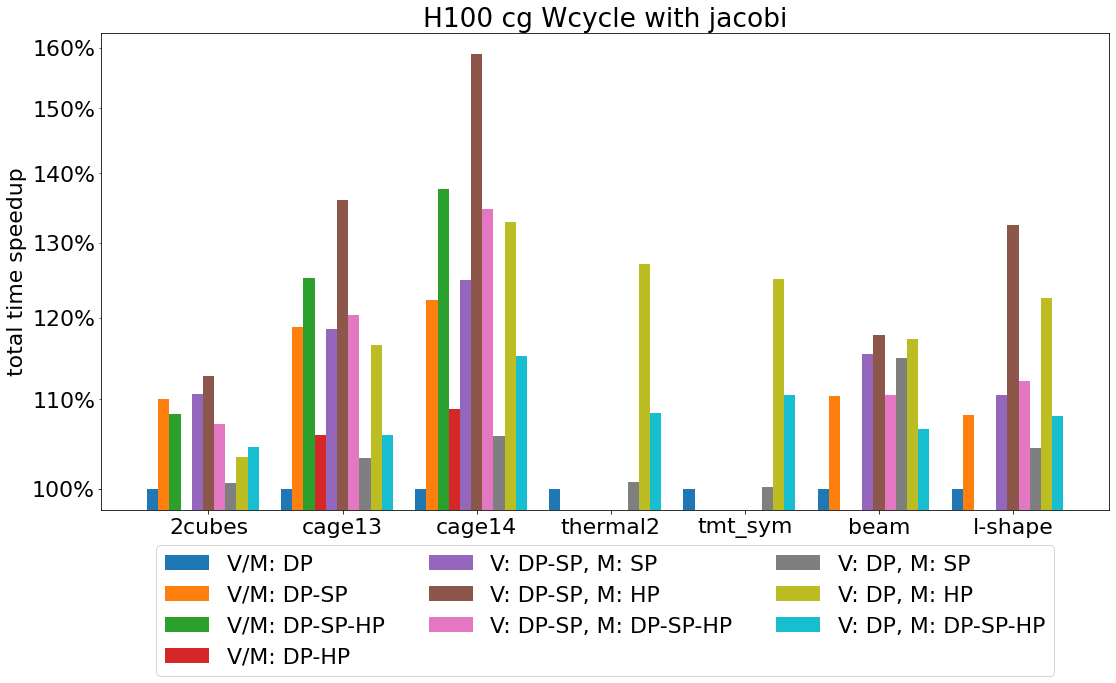

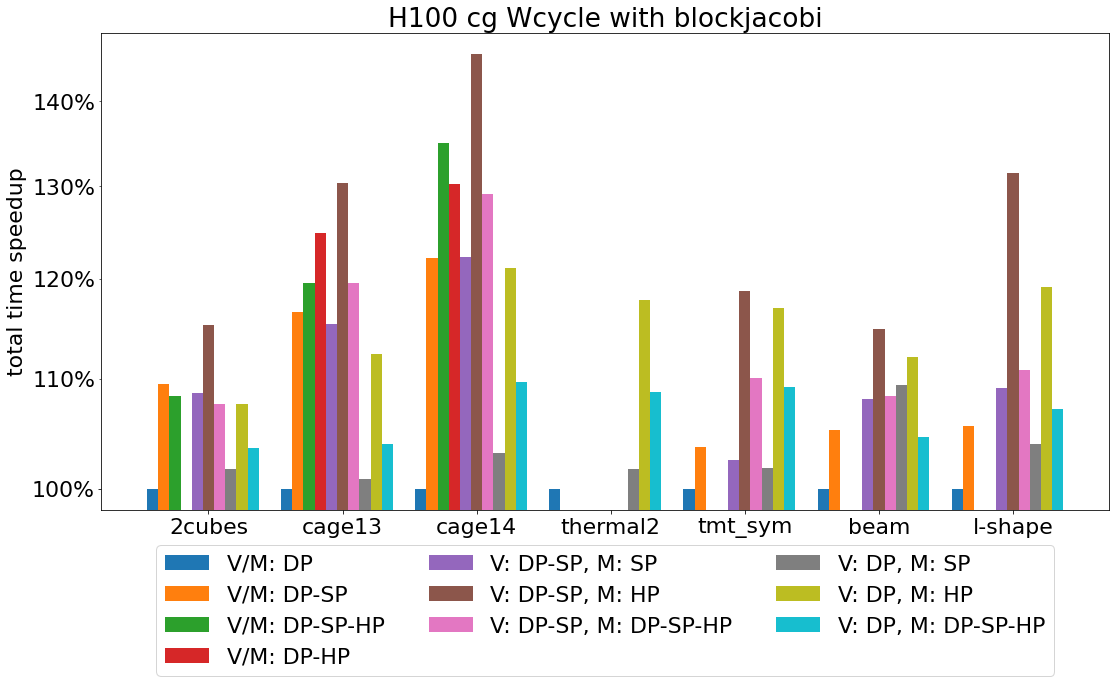

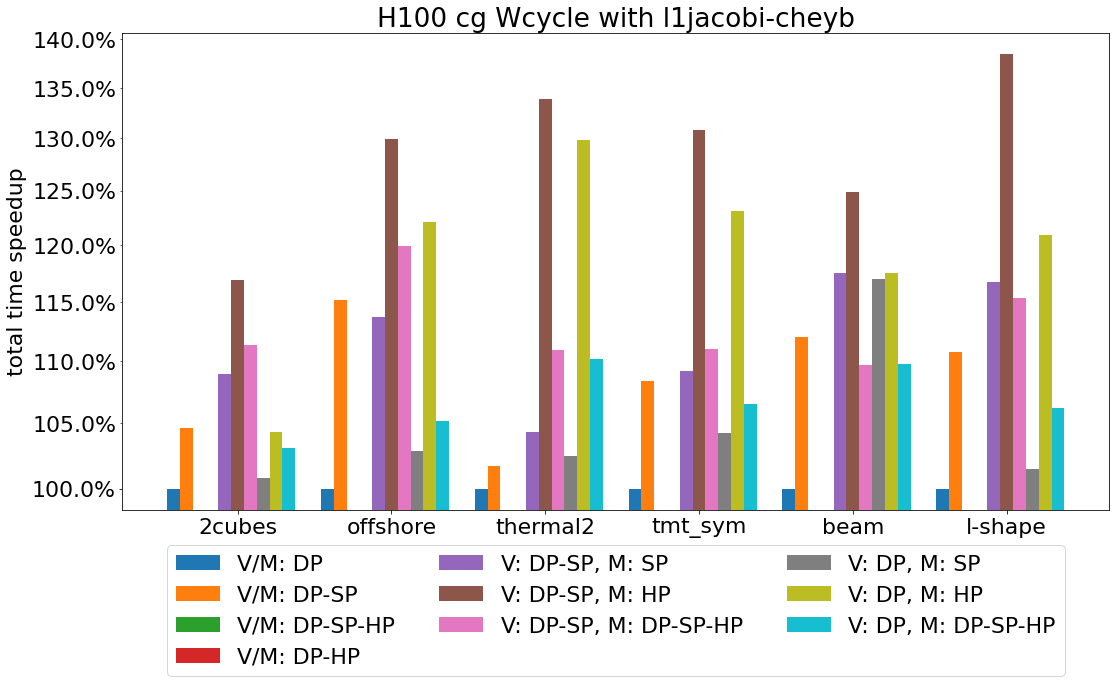

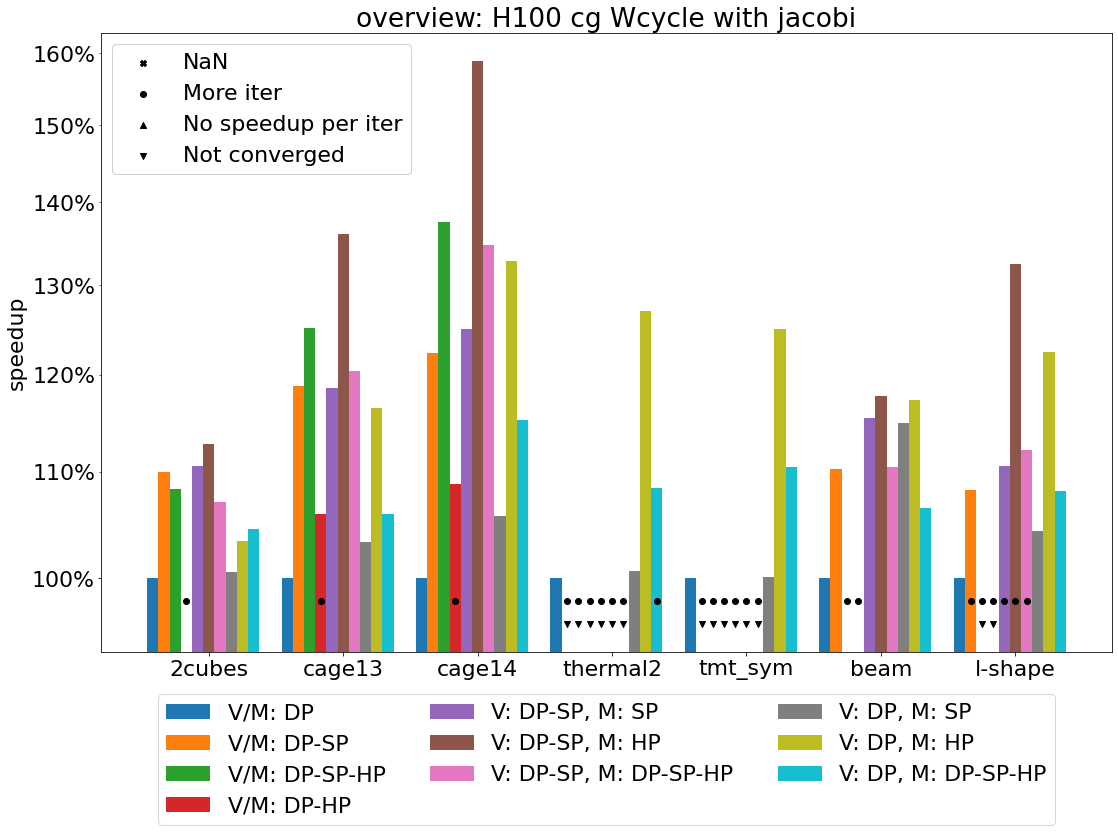

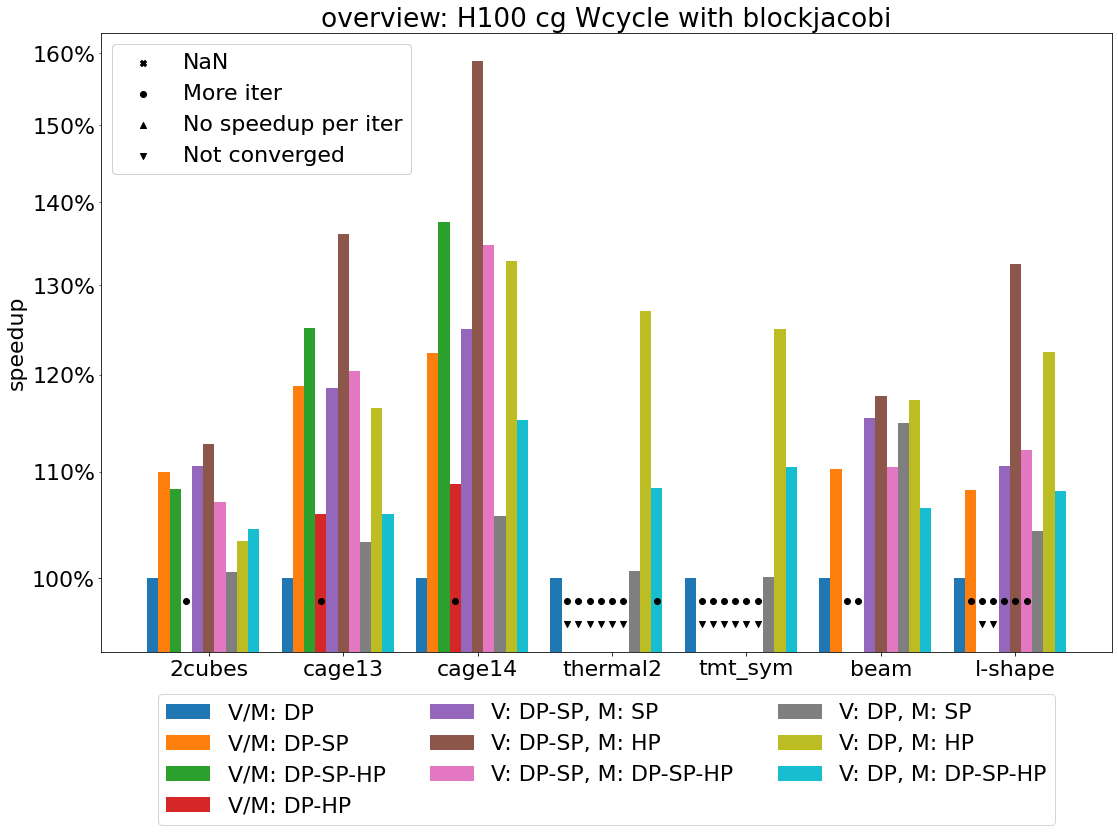

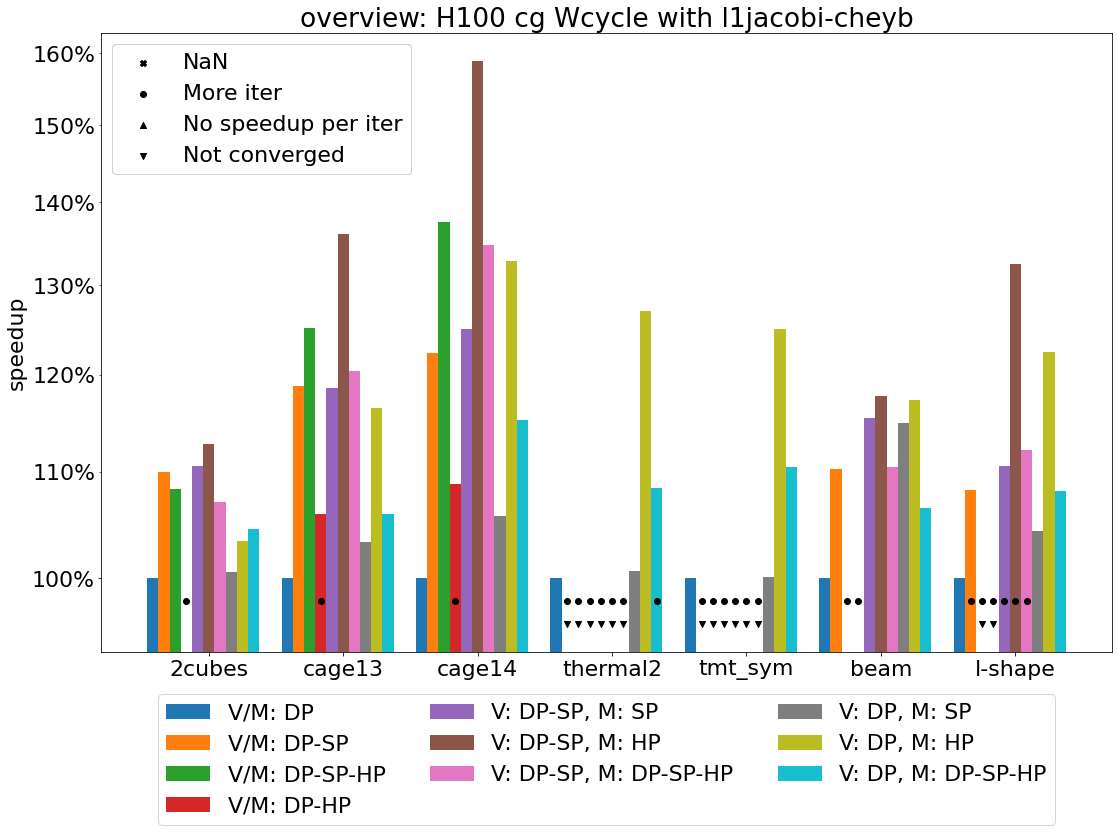

In [132]:
plot_total_speedup('h100_th_result/collect_case_3_w_cg_jacobi.csv', "H100 cg Wcycle with jacobi")
plot_total_speedup('h100_th_result/collect_case_3_w_cg_bj.csv', "H100 cg Wcycle with blockjacobi")
plot_total_speedup('h100_th_result/collect_case_3_w_cg_l1cheyb.csv', "H100 cg Wcycle with l1jacobi-cheyb", is_jacobi=False)

plot_overview('h100_th_result/collect_case_3_w_cg_jacobi.csv', "overview: H100 cg Wcycle with jacobi", "speedup", 
              saved_name=generate_saved_name("H100 cg Wcycle with jacobi", 'speedup overview'))

plot_overview('h100_th_result/collect_case_3_w_cg_jacobi.csv', "overview: H100 cg Wcycle with blockjacobi", "speedup", 
              saved_name=generate_saved_name("H100 cg Wcycle with blockjacobi", 'speedup overview'))

plot_overview('h100_th_result/collect_case_3_w_cg_jacobi.csv', "overview: H100 cg Wcycle with l1jacobi-cheyb", "speedup", 
              saved_name=generate_saved_name("H100 cg Wcycle with l1jacobi-cheyb", 'speedup overview'))


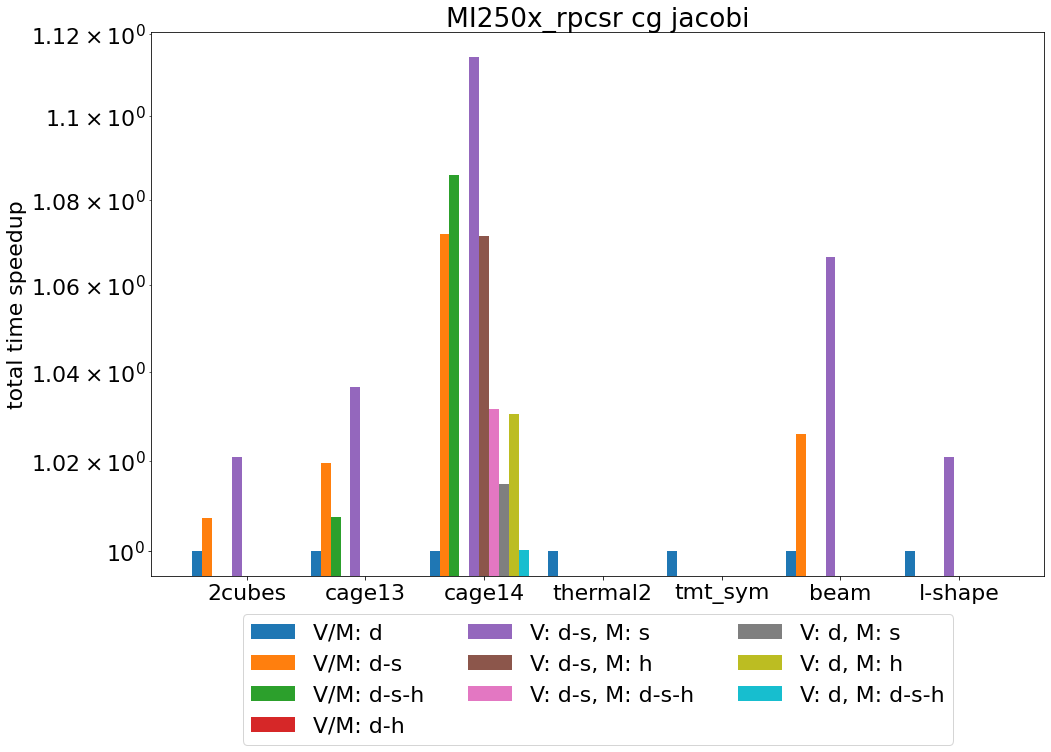

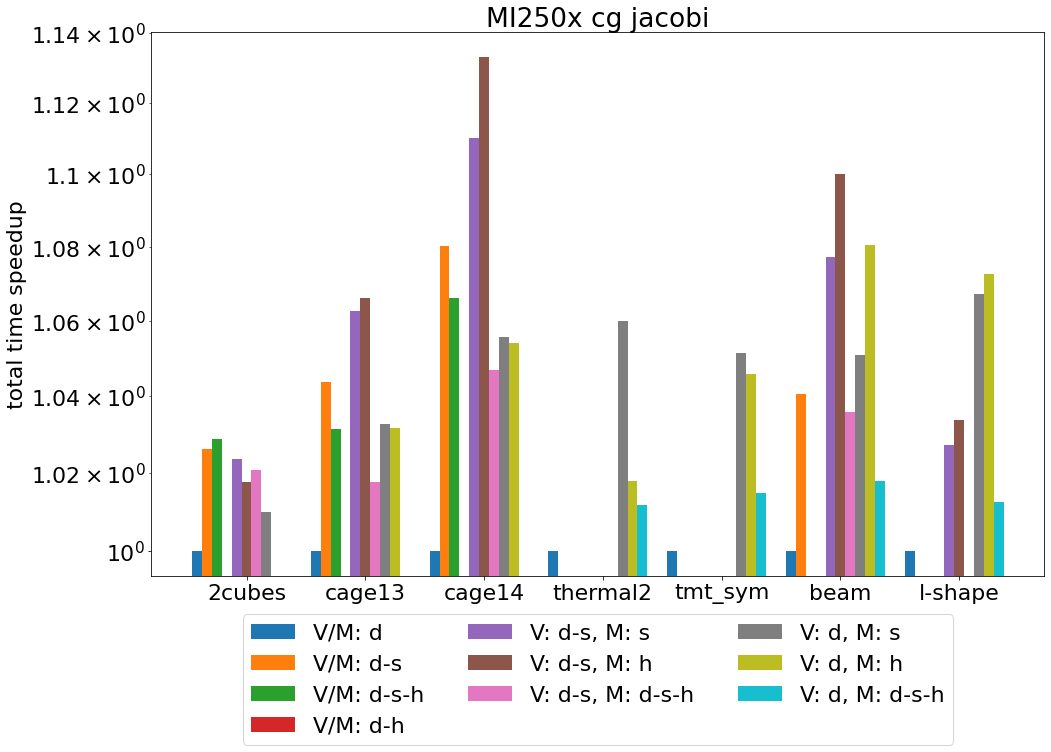

In [17]:
plot_total_speedup('MI250x_rpcsr/collect_case_10_v_cg_jacobi.csv', "MI250x_rpcsr cg jacobi")
plot_total_speedup('mi250x/collect_case_10_v_cg_jacobi.csv', "MI250x cg jacobi")